# Credit Risk Analysis Using Exploratory Data Analysis (EDA)

In [1]:
# Importing all the necessary Libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Importing Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Setting the visibility range for rows and columns

pd.set_option('display.max_columns',500)
pd.set_option('max_rows',500)
sns.set_theme('poster')

## Reading Dataset from the Directory

**Note:- Please change the reading directory of the dataset as per your requirement.**   

  - **application_data.csv** as current_data     
  - **previous_application.csv** as previous_data    

In [4]:
current_data = pd.read_csv(r"C:/Users/gohel/OneDrive/Desktop/UpGrad/UpGrad Portal Course/Portal Files/Course 1 - Data Toolkit/Module - 7 Credit EDA Assignment/Credit EDA Assignemnt Submission - Vatsal/Data/application_data.csv")

In [5]:
previous_data = pd.read_csv(r"C:/Users/gohel/OneDrive/Desktop/UpGrad/UpGrad Portal Course/Portal Files/Course 1 - Data Toolkit/Module - 7 Credit EDA Assignment/Credit EDA Assignemnt Submission - Vatsal/Data/previous_application.csv")

In [6]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Checking the Structure(shape) of the Dataset

In [8]:
current_data.shape

(307511, 122)

In [9]:
previous_data.shape

(1670214, 37)

### Current Application Dataset Analysis

In [10]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [11]:
current_data.shape

(307511, 122)

In [12]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
current_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data Cleaning and Missing value check:

### Checking the Duplicate values in the Dataset

In [14]:
## We can clearly seen that there are no duplicates values in the data set.

current_data.duplicated().sum()

0

In [15]:
## Finding the percentage of null values from all the columns

round(current_data.isnull().sum()*100/len(current_data),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [16]:
## Count the number of columns having the null value

count_null = round(current_data.isnull().sum()*100/len(current_data),2)
len(count_null)

122

In [17]:
## Removing the columns which are having high null values
## Setting the threshold value as 40% 

count_null = count_null[count_null>=40]
count_null

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [18]:
len(count_null)

49

In [19]:
current_data = current_data.loc[:,current_data.isnull().sum()*100/len(current_data) <= 40]

In [20]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [21]:
## Checking the Shape of the Data

current_data.shape

(307511, 73)

In [22]:
## Again Checking the percentage of null values

round(current_data.isnull().sum()*100/len(current_data),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

## Imputing the Null Values

- The most effective way to impute missing values is to check what metric will be most appropriate for columns with a low         percentage. 
- If the column is a categorical column, check what category you can fill the null values with. For others, see if the median     or mean can be imputed or not.
- Any column with a percentage value less than 0% is imputed with 0.

In [23]:
current_data.isnull().sum()*100/len(current_data)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [24]:
current_data.update(current_data[['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']].fillna(0))

In [25]:
round(current_data.isnull().sum()*100/len(current_data),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [26]:
len(current_data.isnull().sum()*100/len(current_data))

73

### Analysing the missing values and impute them

In [27]:
current_data.columns[current_data.isnull().any()].tolist()

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### **"OCCUPATION_TYPE"**

In [28]:
current_data['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [29]:
current_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [30]:
current_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

**Approch:**
 - **Observed above, the Laborers have the most number of counts having a considerable difference from the 2nd highest count.**
 - **So replacing the null values with the mode value.**


In [31]:
current_data.OCCUPATION_TYPE.isnull().sum()

96391

In [32]:
current_data.OCCUPATION_TYPE.fillna(current_data.OCCUPATION_TYPE.mode()[0],inplace=True)

In [33]:
current_data.OCCUPATION_TYPE.isnull().sum()

0

In [34]:
current_data.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

### **"EXT_SOURCE_3"**

In [35]:
current_data.EXT_SOURCE_3.head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

In [36]:
current_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

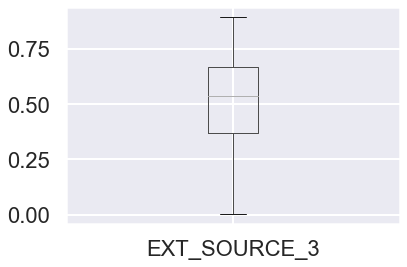

In [37]:
current_data.boxplot(column=['EXT_SOURCE_3'])
plt.show()

In [38]:
current_data.EXT_SOURCE_3.isnull().sum()

60965

**Approch:**
 - **Box plots indicate mean and median are very close and there don't seem to be any outliers.**
 - **So replacing the null values with the mean value.**


In [39]:
current_data['EXT_SOURCE_3'].fillna(current_data['EXT_SOURCE_3'].mean(), inplace=True)

In [40]:
current_data['EXT_SOURCE_3'].isnull().sum()

0

In [41]:
current_data['EXT_SOURCE_3'].describe()

count    307511.000000
mean          0.510853
std           0.174464
min           0.000527
25%           0.417100
50%           0.510853
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [42]:
round(current_data.isnull().sum()*100/len(current_data),3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.000
AMT_GOODS_PRICE                 0.000
NAME_TYPE_SUITE                 0.000
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE                      0.000
FLAG_EMAIL  

### **"AMT_REQ_CREDIT_BUREAU"** Data

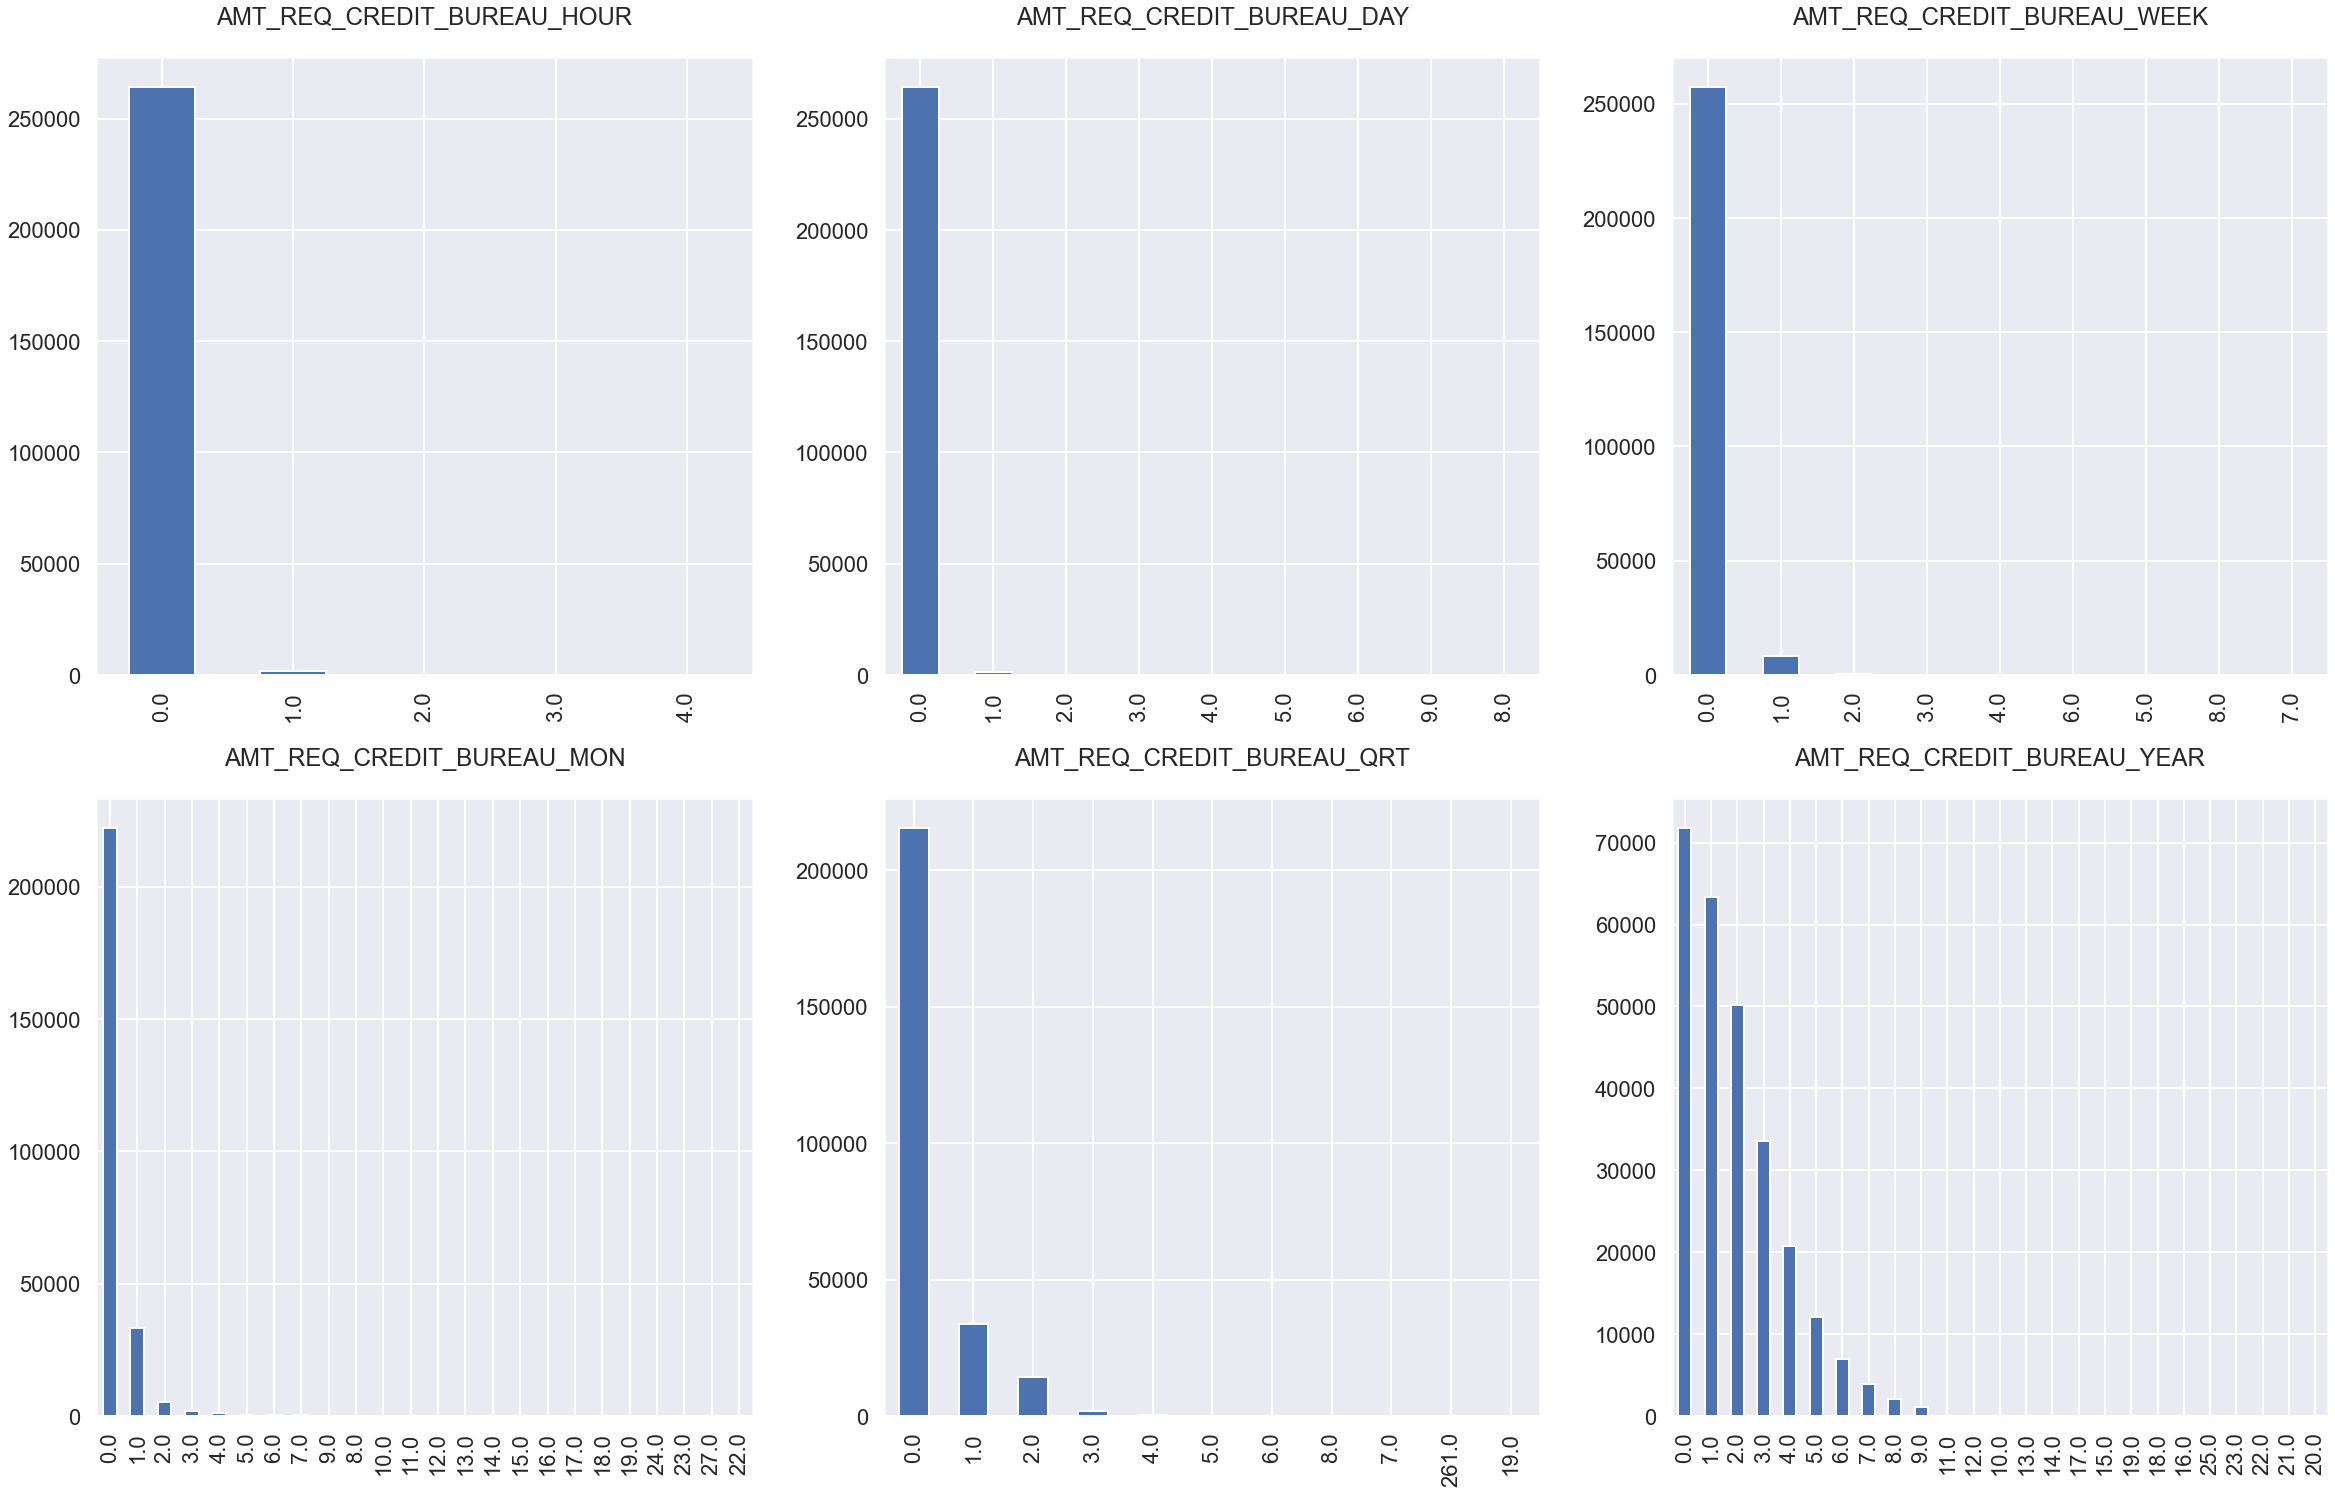

In [43]:
plt.figure(figsize=[40,25])
plt.subplot(2,3,1)
current_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_HOUR\n')
plt.subplot(2,3,2)
current_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_DAY\n')
plt.subplot(2,3,3)
current_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_WEEK\n')
plt.subplot(2,3,4)
current_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_MON\n')
plt.subplot(2,3,5)
current_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_QRT\n')
plt.subplot(2,3,6)
current_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().plot.bar()
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR\n')

plt.show()

**Approch:**
 - **From the above Bar graph, it is clear that in all graphs except "AMT_REQ_CREDIT_BUREAU_YEAR" we are receiving most value counts as 0. So we will replace all null values with 0's in rest AMT_REQ_CREDIT_BUREAU.**

In [44]:
current_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**Approch:**
 - **For AMT_REQ_CREDIT_BUREAU_YEAR, the null value will be replaced with the mean.**

In [45]:
current_data.update(current_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON']].fillna(0))

In [46]:
current_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(current_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)

In [47]:
current_data.isnull().sum()/len(current_data)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

### The Data types of all columns should be checked and changed wherever necessary

In [48]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [49]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [50]:
current_data.shape

(307511, 73)

In [51]:
current_data[current_data['DAYS_BIRTH'] < -0].shape

(307511, 73)

In [52]:
current_data[current_data['DAYS_EMPLOYED'] < -0].shape

(252135, 73)

In [53]:
current_data[current_data['DAYS_REGISTRATION'] < -0].shape

(307431, 73)

In [54]:
current_data[current_data['DAYS_ID_PUBLISH'] < -0].shape

(307495, 73)

In [55]:
current_data[current_data['DAYS_LAST_PHONE_CHANGE'] < -0].shape

(269838, 73)

**Approch:**
 - **In the columns like 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', and 'DAYS_LAST_PHONE_CHANGE', there are negative values that need to be changed to positive values as it seems contrary to the intent it serves.**

In [56]:
## Converting the negative values to positive values 

current_data['DAYS_BIRTH'] = current_data['DAYS_BIRTH'].abs()
current_data['DAYS_EMPLOYED'] = current_data['DAYS_EMPLOYED'].abs()
current_data['DAYS_REGISTRATION'] = current_data['DAYS_REGISTRATION'].abs()
current_data['DAYS_ID_PUBLISH'] = current_data['DAYS_ID_PUBLISH'].abs()
current_data['DAYS_LAST_PHONE_CHANGE'] = current_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [57]:
current_data[current_data['DAYS_BIRTH'] < -0].shape

(0, 73)

In [58]:
current_data[current_data['DAYS_EMPLOYED'] < -0].shape

(0, 73)

In [59]:
current_data[current_data['DAYS_REGISTRATION'] < -0].shape

(0, 73)

In [60]:
current_data[current_data['DAYS_ID_PUBLISH'] < -0].shape

(0, 73)

In [61]:
current_data[current_data['DAYS_LAST_PHONE_CHANGE'] < -0].shape

(0, 73)

### Differentiating Categorical and Continuous Variables from Dataset 

In [62]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [63]:
current_data.nunique().sort_values(ascending=True)

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

**Approch:**
 - **Considering the unique numbers which are less than or equal to 70 as Categorical Variables.**
 - **Considering the unique numbers which are greater than 70 as Continuous Variables.**
 - **If needed for further analysis we can check upon the variables.**

## For Numerical Columns Identify the Outliers 

In [64]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

[]

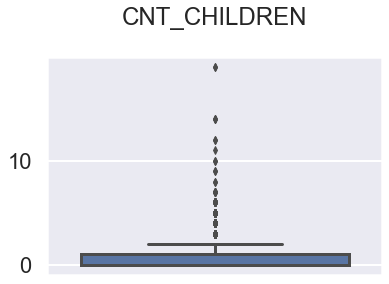

In [65]:
sns.set_style("darkgrid")
sns.boxplot(y = current_data['CNT_CHILDREN'])
plt.title('CNT_CHILDREN\n')
plt.ylabel('')
plt.plot()

In [66]:
Q1 = current_data['CNT_CHILDREN'].quantile(0.25)
Q3 = current_data['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -1.5
upper_whisker =  2.5


**Approch:**
 - **According to the Box Plot and Whisker Calculation above, the upper whisker value is 2.5 and as the count of children cannot be in decimal, we can conclude that values greater than 3 are outliers.**

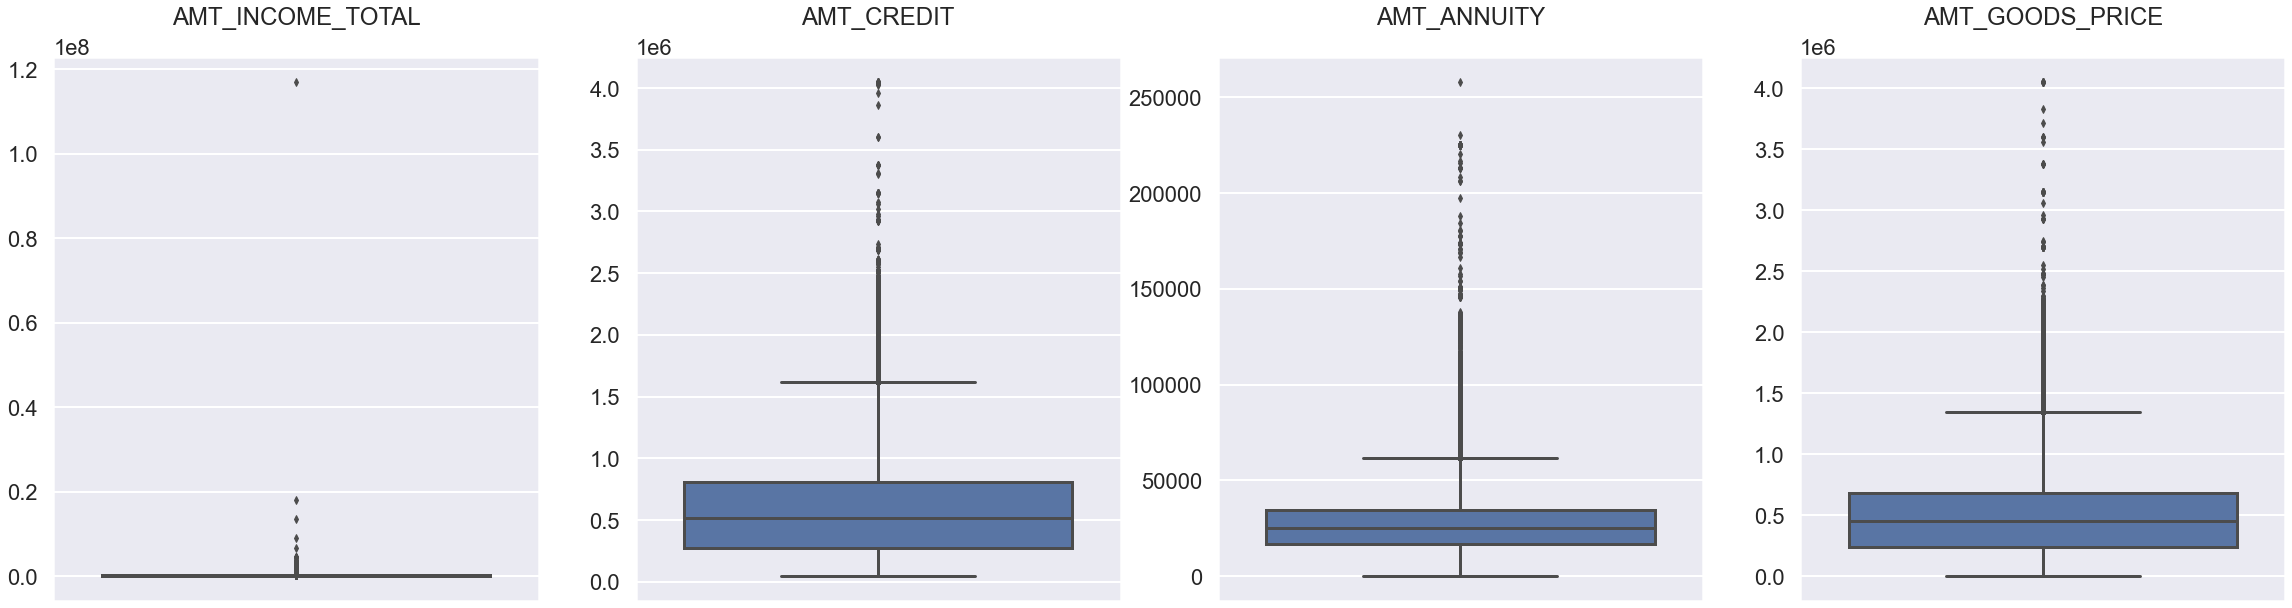

In [67]:
plt.figure(figsize=[40,10])
plt.subplot(1,4,1)
sns.boxplot(y = current_data['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL\n')
plt.ylabel('')
plt.subplot(1,4,2)
sns.boxplot(y = current_data['AMT_CREDIT'])
plt.title('AMT_CREDIT\n')
plt.ylabel('')
plt.subplot(1,4,3)
sns.boxplot(y = current_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY\n')
plt.ylabel('')
plt.subplot(1,4,4)
sns.boxplot(y = current_data['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE\n')
plt.ylabel('')

plt.show()

In [68]:
Q1 = current_data['AMT_ANNUITY'].quantile(0.25)
Q3 = current_data['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -10584.0
upper_whisker =  61704.0


In [69]:
current_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27107.516051
std       14494.443757
min           0.000000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [70]:
Q1 = current_data['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = current_data['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -423000.0
upper_whisker =  1341000.0


In [71]:
current_data['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.379095e+05
std      3.696338e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [72]:
Q1 = current_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = current_data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -22500.0
upper_whisker =  337500.0


In [73]:
current_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [74]:
Q1 = current_data['AMT_CREDIT'].quantile(0.25)
Q3 = current_data['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -537975.0
upper_whisker =  1616625.0


In [75]:
current_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

**Approch:**
 - **Based on the Box Plot and Whisker Calculation above, the lower whisker value for 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', and 'AMT_CREDIT' is negative. As there can't be negative amounts, we look for outliers that are above the upper whisker value.**

In [76]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [77]:
## As the registartion days should be in integer so changed the type of data

current_data['DAYS_REGISTRATION'] = current_data['DAYS_REGISTRATION'].astype('int64')

In [78]:
current_data['DAYS_REGISTRATION'].dtype

dtype('int64')

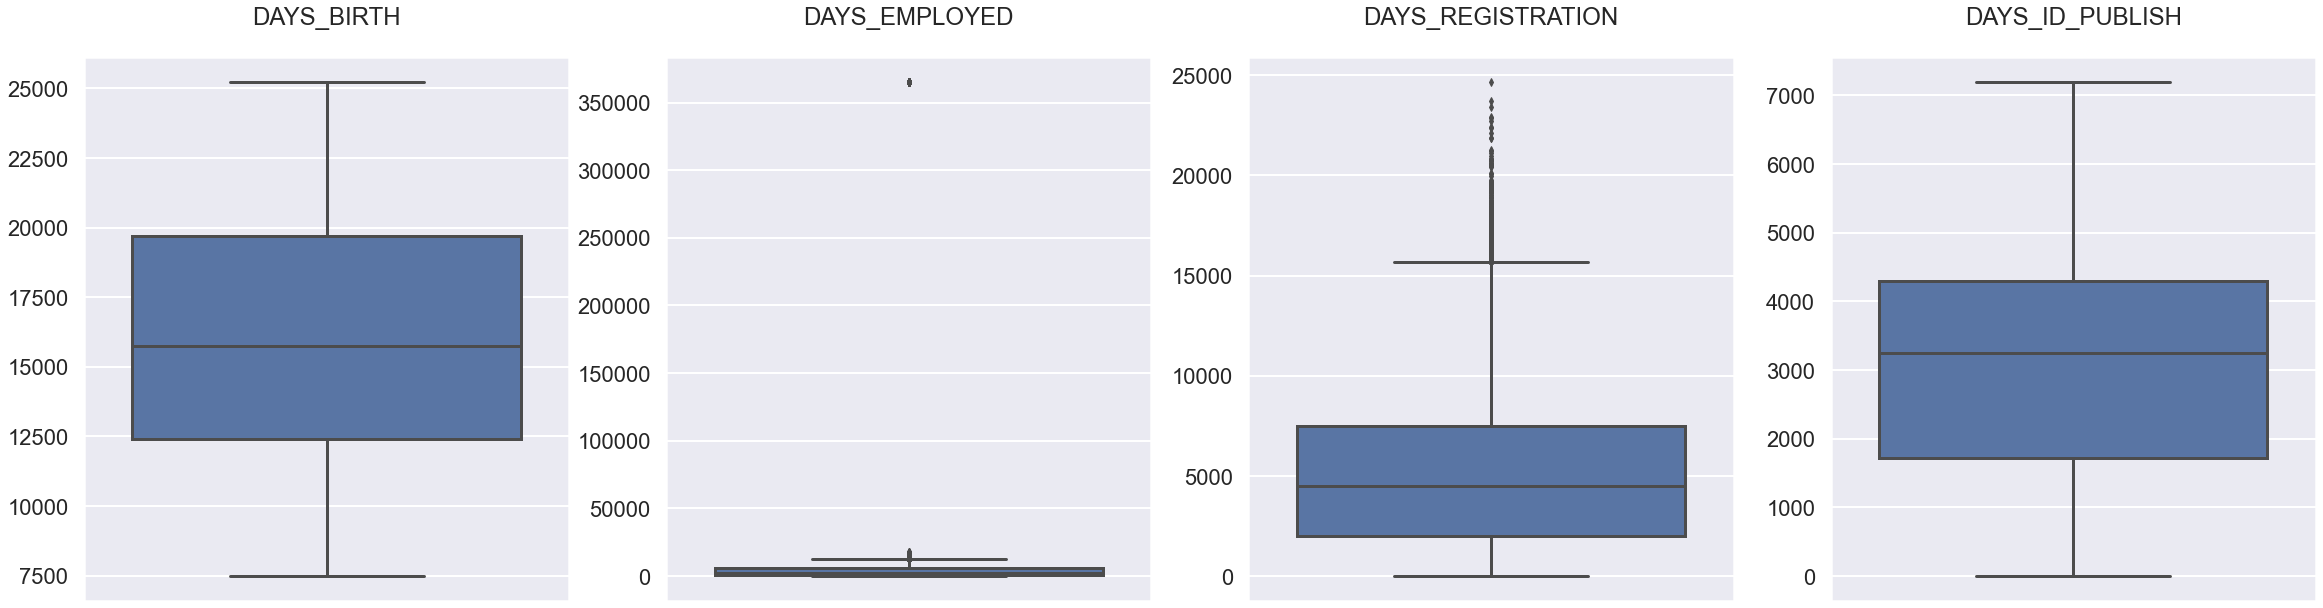

In [79]:
plt.figure(figsize=[40,10])
plt.subplot(1,4,1)
sns.boxplot(y = current_data['DAYS_BIRTH'])
plt.title('DAYS_BIRTH\n')
plt.ylabel('')
plt.subplot(1,4,2)
sns.boxplot(y = current_data['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED\n')
plt.ylabel('')
plt.subplot(1,4,3)
sns.boxplot(y = current_data['DAYS_REGISTRATION'])
plt.title('DAYS_REGISTRATION\n')
plt.ylabel('')
plt.subplot(1,4,4)
sns.boxplot(y = current_data['DAYS_ID_PUBLISH'])
plt.title('DAYS_ID_PUBLISH\n')
plt.ylabel('')

plt.show()

In [80]:
current_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
Q1 = current_data['DAYS_REGISTRATION'].quantile(0.25)
Q3 = current_data['DAYS_REGISTRATION'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("lower_whisker = ",lower_whisker)
print("upper_whisker = ",upper_whisker)

lower_whisker =  -6194.25
upper_whisker =  15683.75


In [82]:
current_data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120327
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

**Approch:**
 - **From the graph above, it is clear that there are no outliers for 'DAYS_BIRTH' and 'DAYS_ID_PUBLISH'.**
 - **When viewing the graph and data for 'DAYS_EMPLOYED', it is clear that the maximum value is 360000+ as it states an employee is working that many days which is not possible, so it is an outlier.**
 - **From the graph and calculation of the 'DAYS_REGISTRATION' data, it can be seen that there are outliers in the data.**

### Grouping a number of Continuous Variables into smaller group

In [83]:
Q1 = current_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q2 = current_data['AMT_INCOME_TOTAL'].quantile(0.50)
Q3 = current_data['AMT_INCOME_TOTAL'].quantile(0.75)
max1 = current_data['AMT_INCOME_TOTAL'].max()

## Creating a new row named 'AMT_INCOME_TOTAL_PARTS'
current_data['AMT_INCOME_TOTAL_PARTS'] = pd.cut(current_data['AMT_INCOME_TOTAL'],[Q1,Q2,Q3,max1],labels=['Low','Medium','High'])

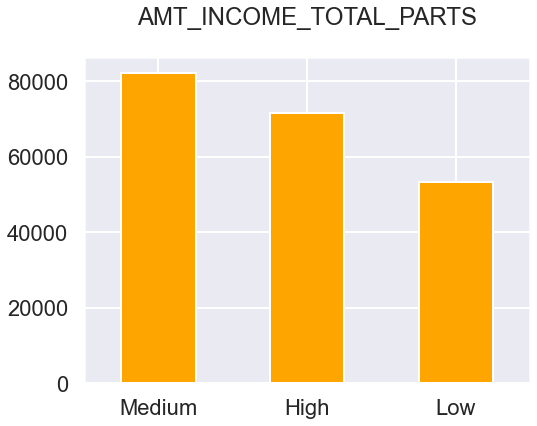

In [84]:
plt.figure(figsize=[8,6])
current_data['AMT_INCOME_TOTAL_PARTS'].value_counts().plot.bar(color = 'Orange')
plt.title('AMT_INCOME_TOTAL_PARTS\n')
plt.xticks(rotation=0)
plt.show()

**Approch:**
 - **As we can see from the graph above, more people are earning a medium-income than High and low income.**


In [85]:
Parts = [0,350000,700000,1000000000]
slots = ['0-3.5L','3.5L-7L','7L-1B']
## Creating a new row named 'AMT_CREDIT_PARTS'
current_data['AMT_CREDIT_PARTS']=pd.cut(current_data['AMT_CREDIT'],Parts,labels=slots)

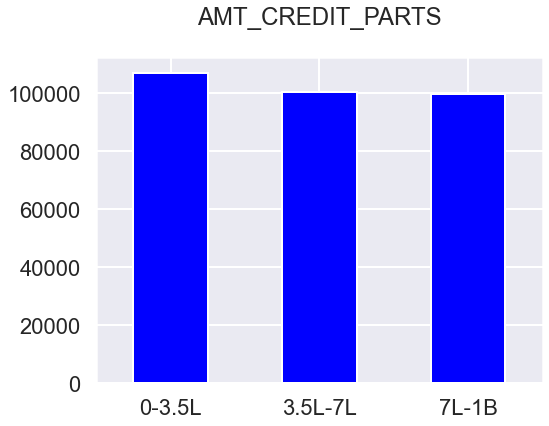

In [86]:
plt.figure(figsize=[8,6])
current_data['AMT_CREDIT_PARTS'].value_counts().plot.bar(color = 'Blue')
plt.title('AMT_CREDIT_PARTS\n')
plt.xticks(rotation=0)
plt.show()

**Approch:**
 - **Based on the graph above, we can see that all bins have almost equal credit amount.**

In [87]:
current_data['DAYS_BIRTH'].value_counts()

13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24898     1
24868     1
8017      1
25098     1
25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [88]:
#Creating a new row named 'YEARS_BIRTH_PARTS'
parts = [0,7300,10950,14600,18250,21900,25500]
slots = ['0-20','20-30','30-40','40-50','50-60','60-70']
current_data['YEARS_BIRTH_PARTS']=pd.cut(current_data['DAYS_BIRTH'],bins=parts,labels=slots)

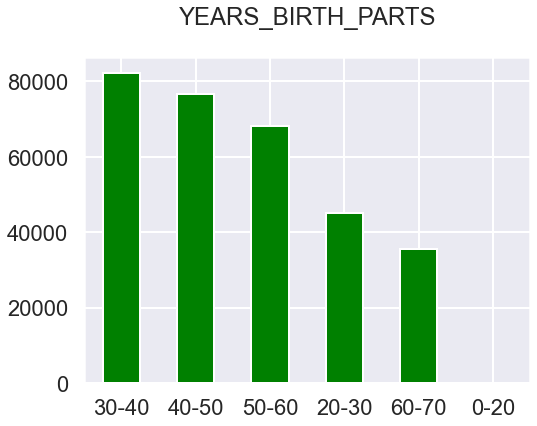

In [89]:
plt.figure(figsize=[8,6])
current_data['YEARS_BIRTH_PARTS'].value_counts().plot.bar(color = 'Green')
plt.title('YEARS_BIRTH_PARTS\n')
plt.xticks(rotation=0)
plt.show()

**Approch:**
- **Observing the graph above, it can be seen that the age range of 30-40 represents the majority of clients.**

### Removing the Columns which are not necessary for the Data Analysis

- **For the Analysis, FLAG_DOCUMENT is not necessary, so it is removed from the data set.**

In [90]:
current_data.columns[47:67]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [91]:
current_data.drop(current_data.columns[47:67], axis = 1, inplace = True)

In [92]:
current_data.shape

(307511, 56)

# Starting with Analysis of Application Data:

In [93]:
current_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## Checking the Target Variable

In [94]:
current_data['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [95]:
current_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [96]:
current_data['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

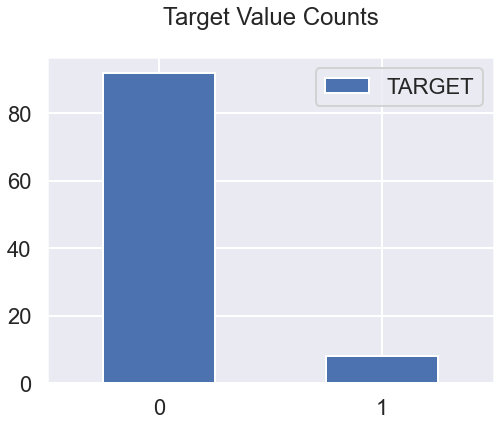

In [97]:
plt.figure(figsize=[8,6])
(current_data['TARGET'].value_counts(normalize=True)*100).plot.bar()
plt.title('Target Value Counts\n')
plt.xticks(rotation=0)
plt.annotate
plt.legend()
plt.show()

**Approch:**
 - **We can see that there this an imbalance in the data set.**
 - **The default rate is approximately 8.07% among customers who have difficulty making payments; on the other hand, 91.92% of customers do not face payment difficulties.**


## Dividing the Data set into two parts (Target = 0) Non-Defaulters and (Target = 1) Defaulters

In [98]:
current_data_1 = current_data[current_data['TARGET']==1]
current_data_0 = current_data[current_data['TARGET']==0]

In [99]:
current_data_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [100]:
current_data_0.shape

(282686, 56)

In [101]:
current_data_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   
40                    0.025164       17482           1262               1182   
42                    0.007305       13384           3597                 45   
81                    0.028663       24794         365243               5391   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0        Laborers              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [102]:
current_data_1.shape

(24825, 56)

In [103]:
## Ratio of the Target imbalance Data set

print("Target imbalance Ratio: ",round(len(current_data_0)/len(current_data_1),2))

Target imbalance Ratio:  11.39


## Performing Univariate Analysis on the basis of Target Variables:

### Perform analysis for both 0 and 1 categorical variables 

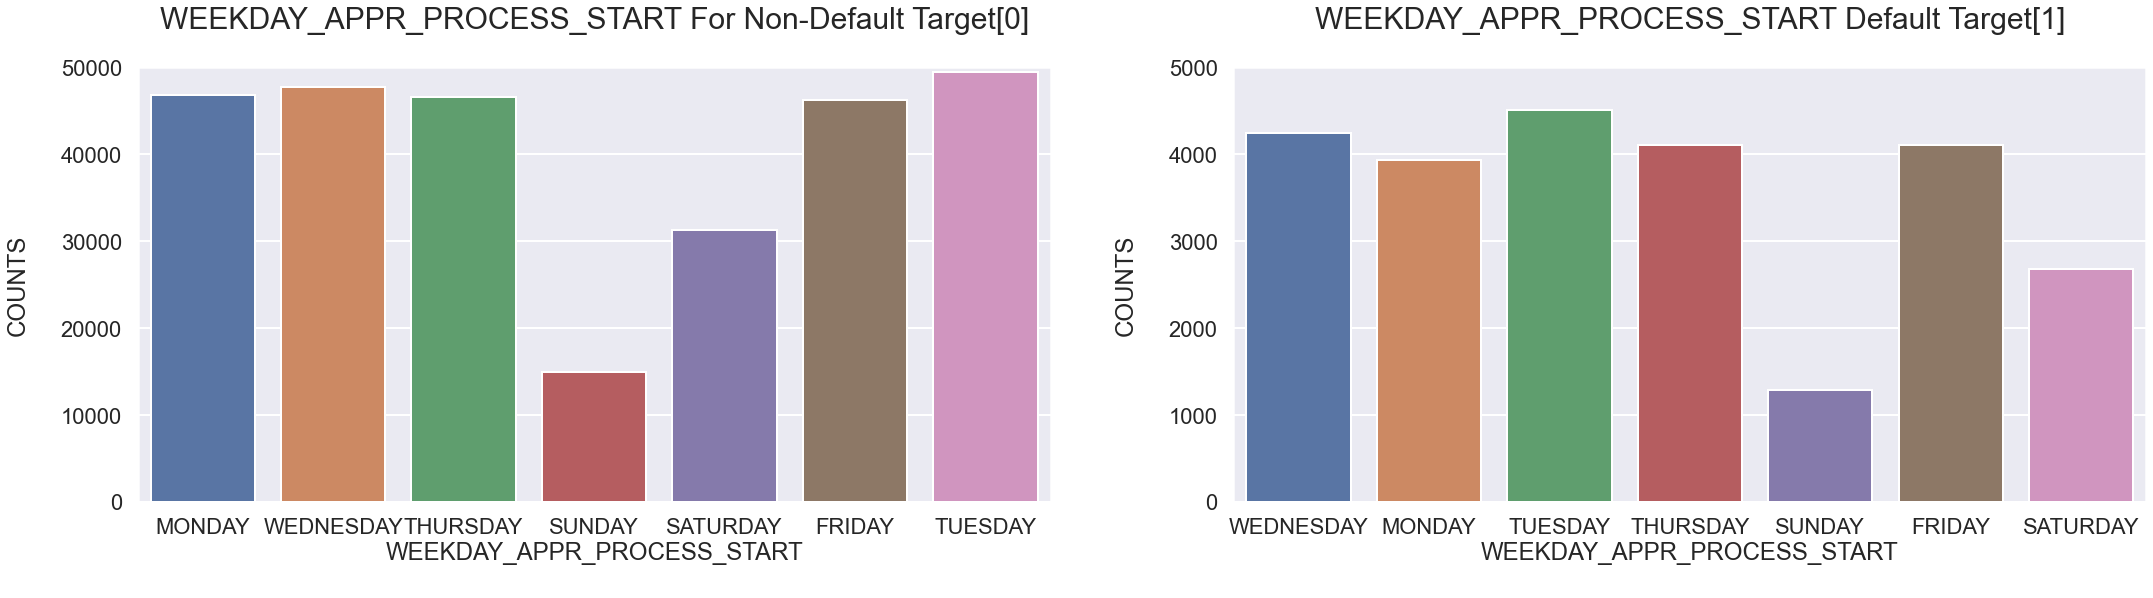

In [104]:
## WEEKDAY_APPR_PROCESS_START Vs Target Variables:

plt.figure(figsize=[36,8])
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.countplot(current_data_0['WEEKDAY_APPR_PROCESS_START'])
plt.ylim(0,50000)
plt.xlabel('WEEKDAY_APPR_PROCESS_START\n',fontsize=24)
plt.ylabel('COUNTS\n',fontsize=24)
plt.title('WEEKDAY_APPR_PROCESS_START For Non-Default Target[0]\n',fontsize=30)

plt.subplot(1,2,2)
sns.countplot(current_data_1['WEEKDAY_APPR_PROCESS_START'])
plt.ylim(0,5000)
plt.xlabel('WEEKDAY_APPR_PROCESS_START\n',fontsize=24)
plt.ylabel('COUNTS\n',fontsize=24)
plt.title('WEEKDAY_APPR_PROCESS_START Default Target[1]\n',fontsize=30)
plt.show()

**Approch:**
 - **On the basis of the above graph, we can conclude that for defaulters and non-defaulters, application processes usually begin on Tuesdays and Wednesdays, and less often on weekends.**

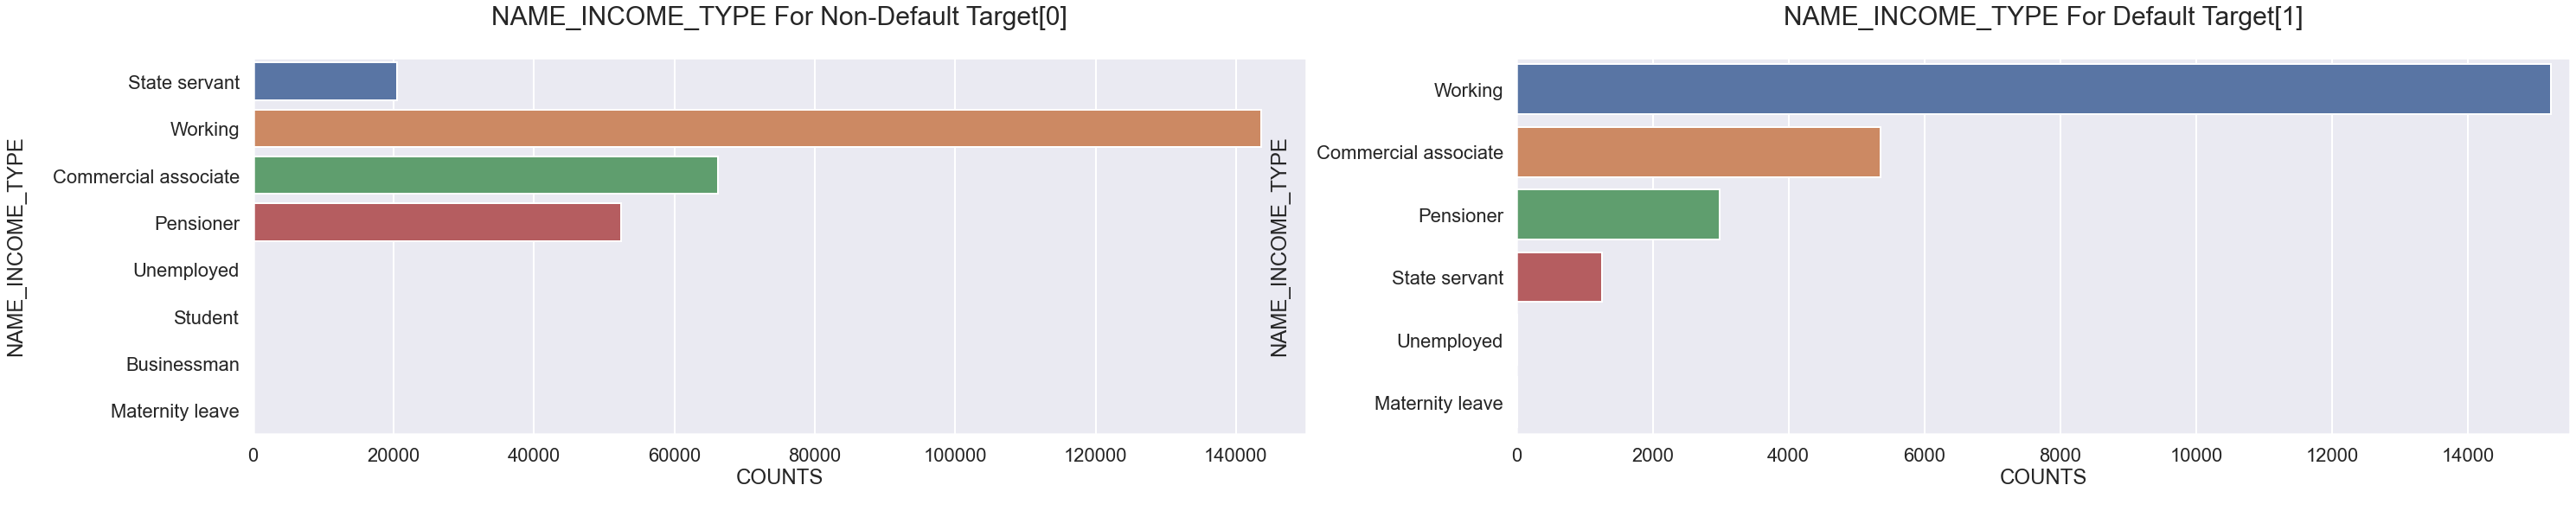

In [105]:
## NAME_INCOME_TYPE Vs Target Variables:

plt.figure(figsize=[48,8])
plt.subplot(1,2,1)
sns.countplot(y = current_data_0['NAME_INCOME_TYPE'])
plt.xlim(0,150000)
plt.ylabel('NAME_INCOME_TYPE\n',fontsize=24)
plt.xlabel('COUNTS\n',fontsize=24)
plt.title('NAME_INCOME_TYPE For Non-Default Target[0]\n',fontsize=30)

plt.subplot(1,2,2)
sns.countplot(y = current_data_1['NAME_INCOME_TYPE'])
plt.xlim(0,15500)
plt.ylabel('NAME_INCOME_TYPE\n',fontsize=24)
plt.xlabel('COUNTS\n',fontsize=24)
plt.title('NAME_INCOME_TYPE For Default Target[1]\n',fontsize=30)

plt.show()

**Approch:**
 - **From the graph, we can conclude that the majority of defaulters are working, but working people are also bringing in a lot of money. The number of non-defaulters is also higher for State employees, pensioners, and commercial associates.**
 - **Giving a loan should therefore be given to working clients first, then commercial associates, pensioners, and public servants.**

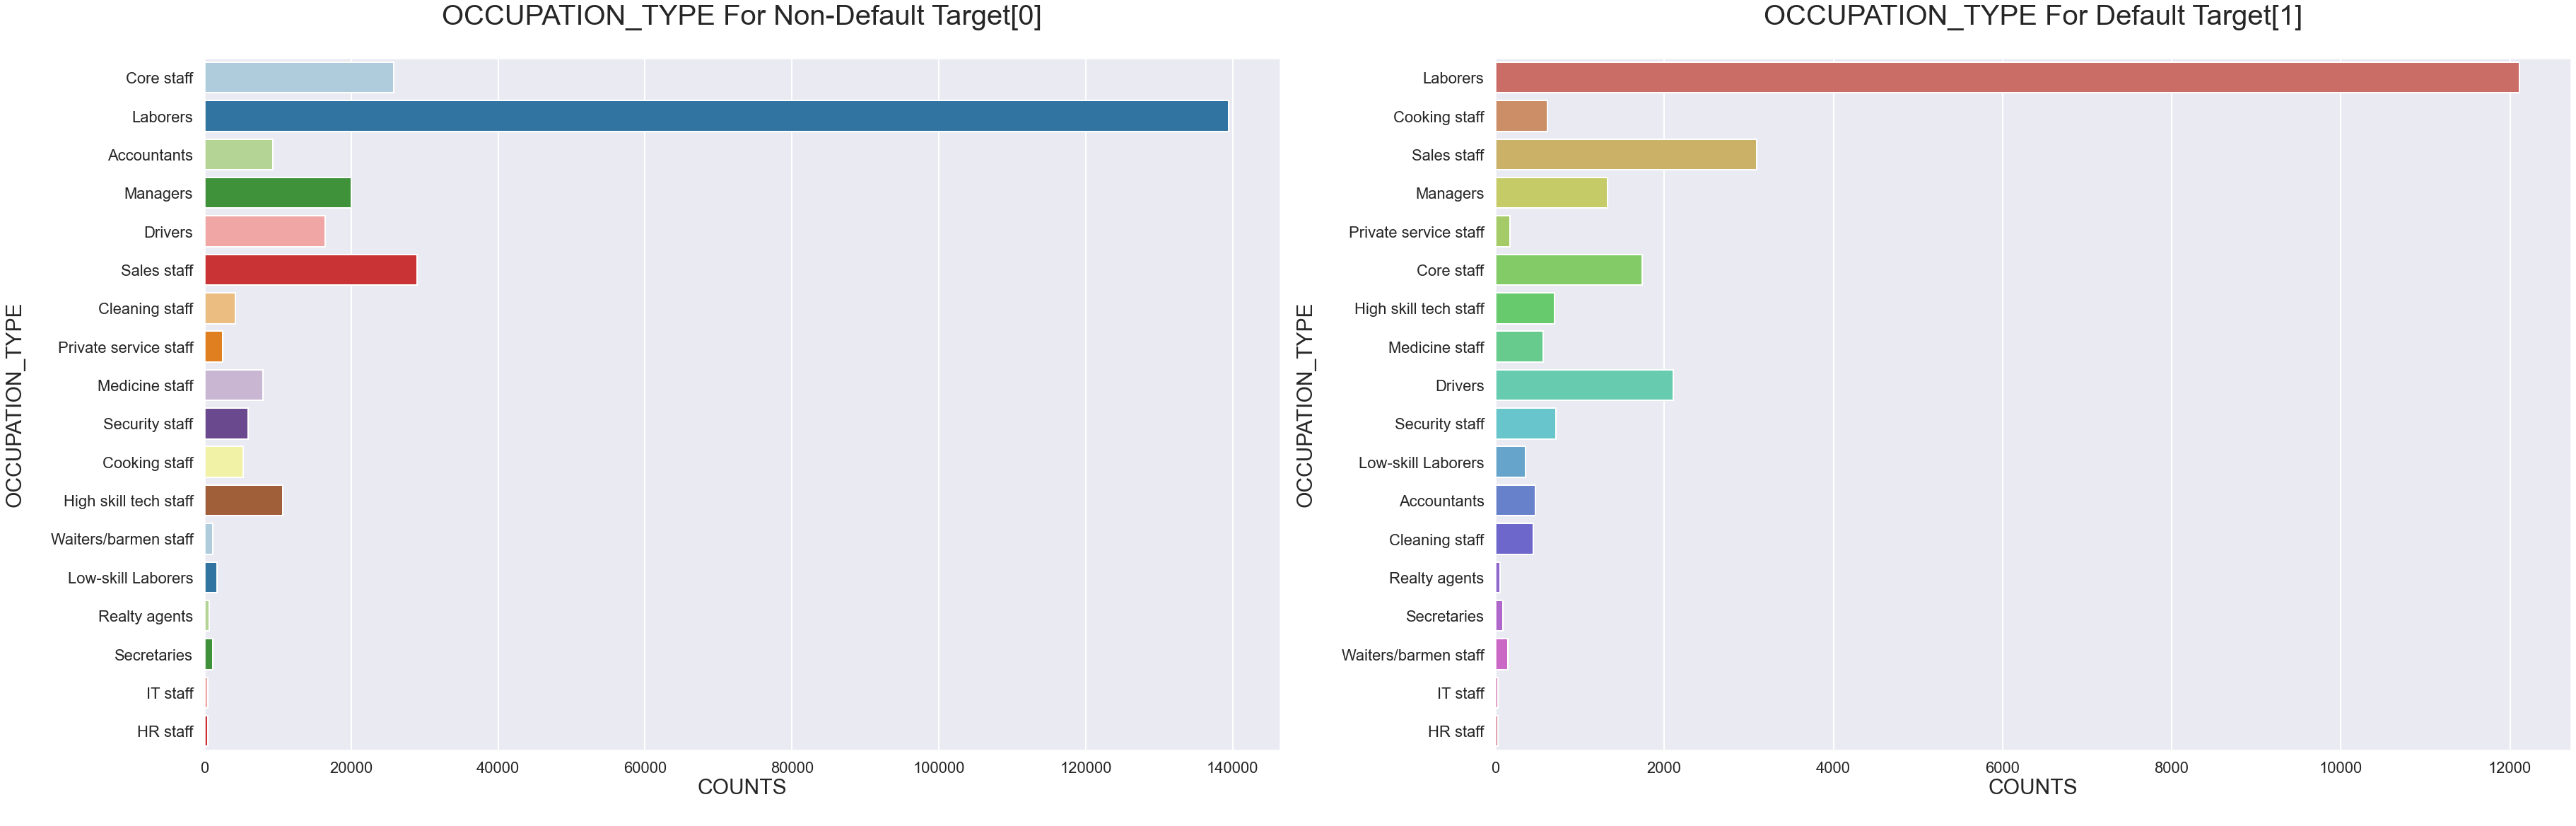

In [106]:
## OCCUPATION_TYPE Vs Target Variables:

plt.figure(figsize=(60,18))

plt.subplot(1,2,1)
sns.countplot(y = current_data_0['OCCUPATION_TYPE'],palette='Paired')
plt.title('OCCUPATION_TYPE For Non-Default Target[0]\n',fontsize=40)
plt.ylabel('OCCUPATION_TYPE\n',fontsize=30)
plt.xlabel('COUNTS\n',fontsize=30)


plt.subplot(1,2,2)
sns.countplot(y = current_data_1['OCCUPATION_TYPE'],palette = "hls")
plt.title('OCCUPATION_TYPE For Default Target[1]\n',fontsize=40)
plt.ylabel('OCCUPATION_TYPE\n',fontsize=30)
plt.xlabel('COUNTS\n',fontsize=30)
plt.show()

**Approch:**
 - **Observing the graph, we can conclude that non-defaulters with an occupation of Laborer make their payments on time, followed by those with an occupation of Sales staff, Core Staff, and Managers. Conversely, defaulters are more likely to hold the occupation of laborer followed by Sales staff, Drivers, and Core staff.**
 - **Laborers, Sales staff, Core Staff, Managers, and Drivers should be provided loans according to this preference ranking. Loans beyond the limitations should not be provided as it would likely be difficult to recover.**

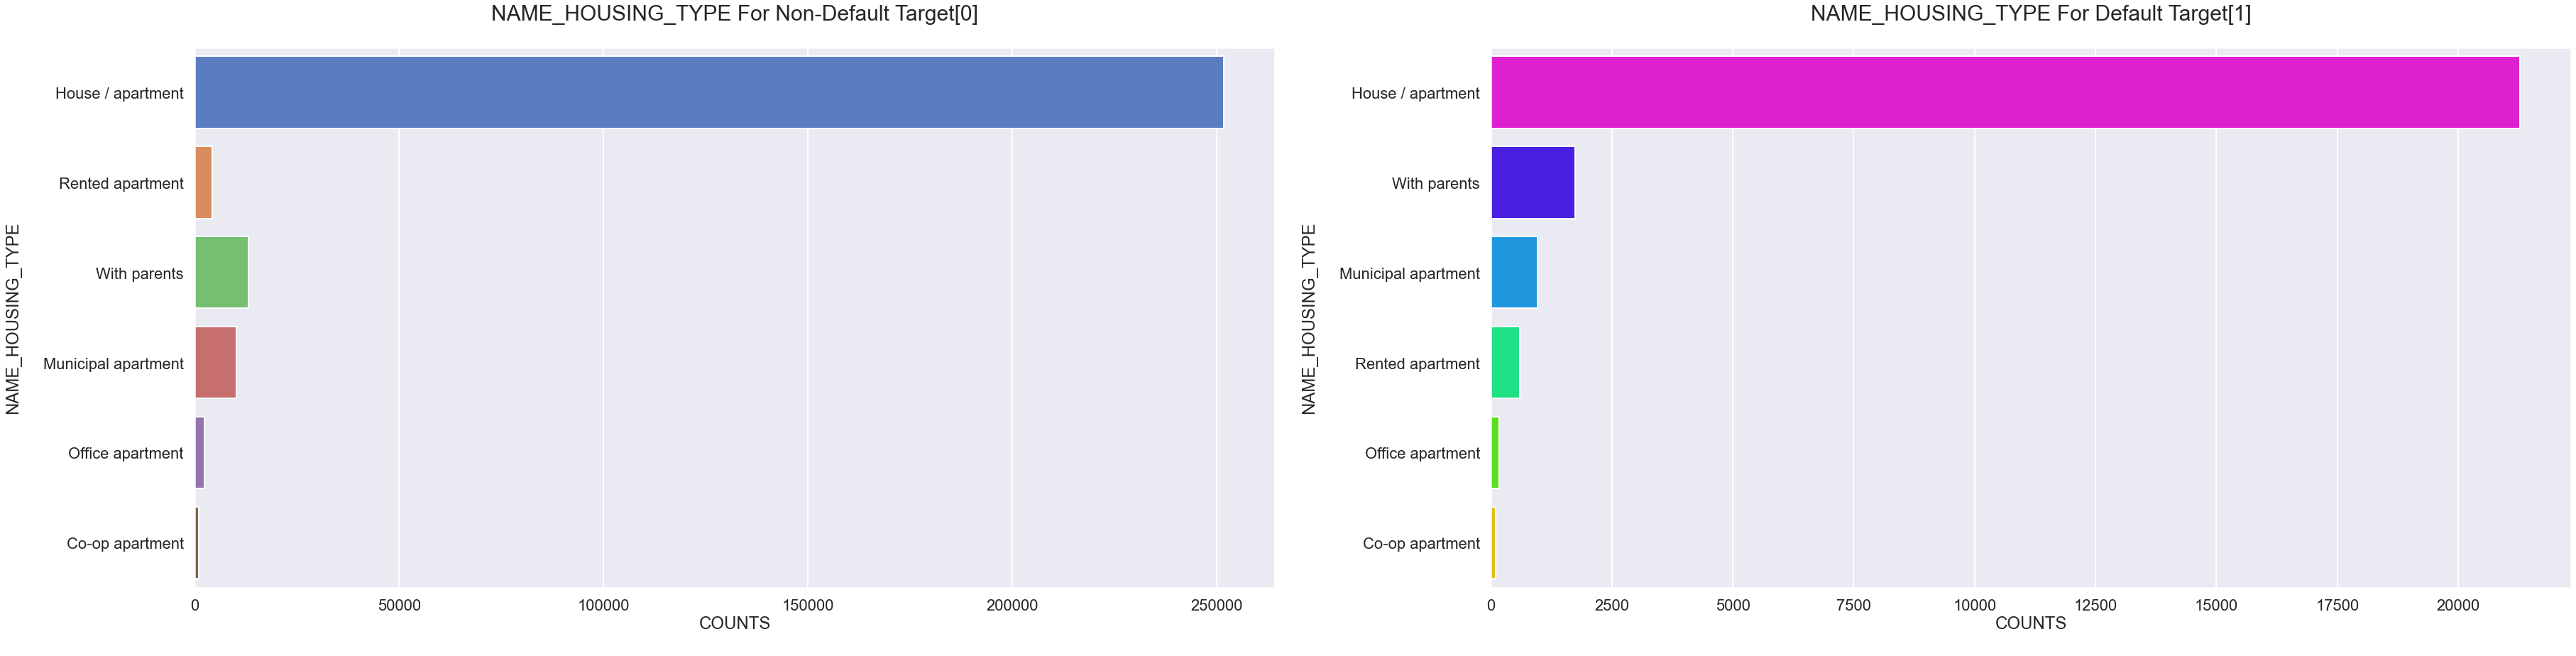

In [107]:
## NAME_HOUSING_TYPE Vs Target Variables:

plt.figure(figsize=(60,14))

plt.subplot(1,2,1)
sns.countplot(y = current_data_0['NAME_HOUSING_TYPE'],palette='muted')
plt.title('NAME_HOUSING_TYPE For Non-Default Target[0]\n',fontsize=30)
plt.ylabel('NAME_HOUSING_TYPE\n',fontsize=24)
plt.xlabel('COUNTS\n',fontsize=24)


plt.subplot(1,2,2)
sns.countplot(y = current_data_1['NAME_HOUSING_TYPE'],palette = 'hsv_r')
plt.title('NAME_HOUSING_TYPE For Default Target[1]\n',fontsize=30)
plt.ylabel('NAME_HOUSING_TYPE\n',fontsize=24)
plt.xlabel('COUNTS\n',fontsize=24)
plt.show()


**Approch:**
 - **We can conclude from the graph that non-defaulters who own their house and live with their parents are most likely to make payments. On the other hand, defaulters also own a house, live with their parents, and may also live in a municipal apartment fails to make payment.**
 - **Banks should provide loan to the Customer who owns their house and avoid giving loans to other.**

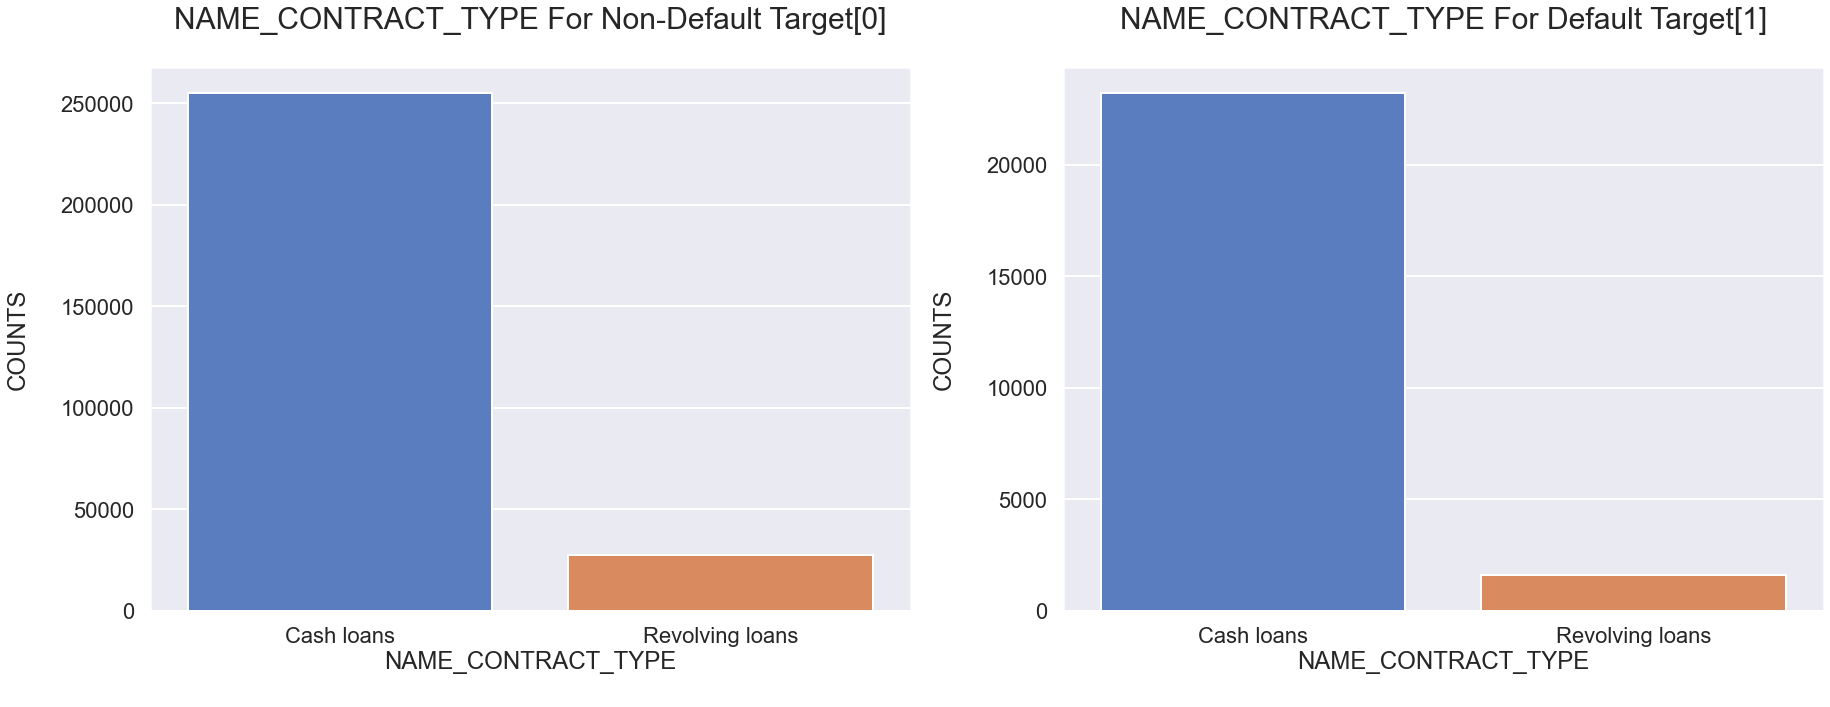

In [108]:
## NAME_CONTRACT_TYPE Vs Target Variables:

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
sns.countplot(current_data_0['NAME_CONTRACT_TYPE'],palette='muted')
plt.title('NAME_CONTRACT_TYPE For Non-Default Target[0]\n',fontsize=30)
plt.xlabel('NAME_CONTRACT_TYPE\n',fontsize=24)
plt.ylabel('COUNTS\n',fontsize=24)


plt.subplot(1,2,2)
sns.countplot(current_data_1['NAME_CONTRACT_TYPE'],palette = 'muted')
plt.title('NAME_CONTRACT_TYPE For Default Target[1]\n',fontsize=30)
plt.xlabel('NAME_CONTRACT_TYPE\n',fontsize=24)
plt.ylabel('COUNTS\n',fontsize=24)
plt.show()



**Approch:**
 - **Based on the graph, we can conclude that non-defaulters have issued more Cash-loans and also paid the installment on time. Defaulters also have more cash loans, but they often have difficulty paying installments.**
 - **Banks should offer more Cash loans over Revolving loans.**

In [109]:
## Plotting Multiple Categorical Columns with respect to Target Variables:

column_names = ['NAME_FAMILY_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE']
list(enumerate(column_names))

[(0, 'NAME_FAMILY_STATUS'), (1, 'CODE_GENDER'), (2, 'NAME_EDUCATION_TYPE')]

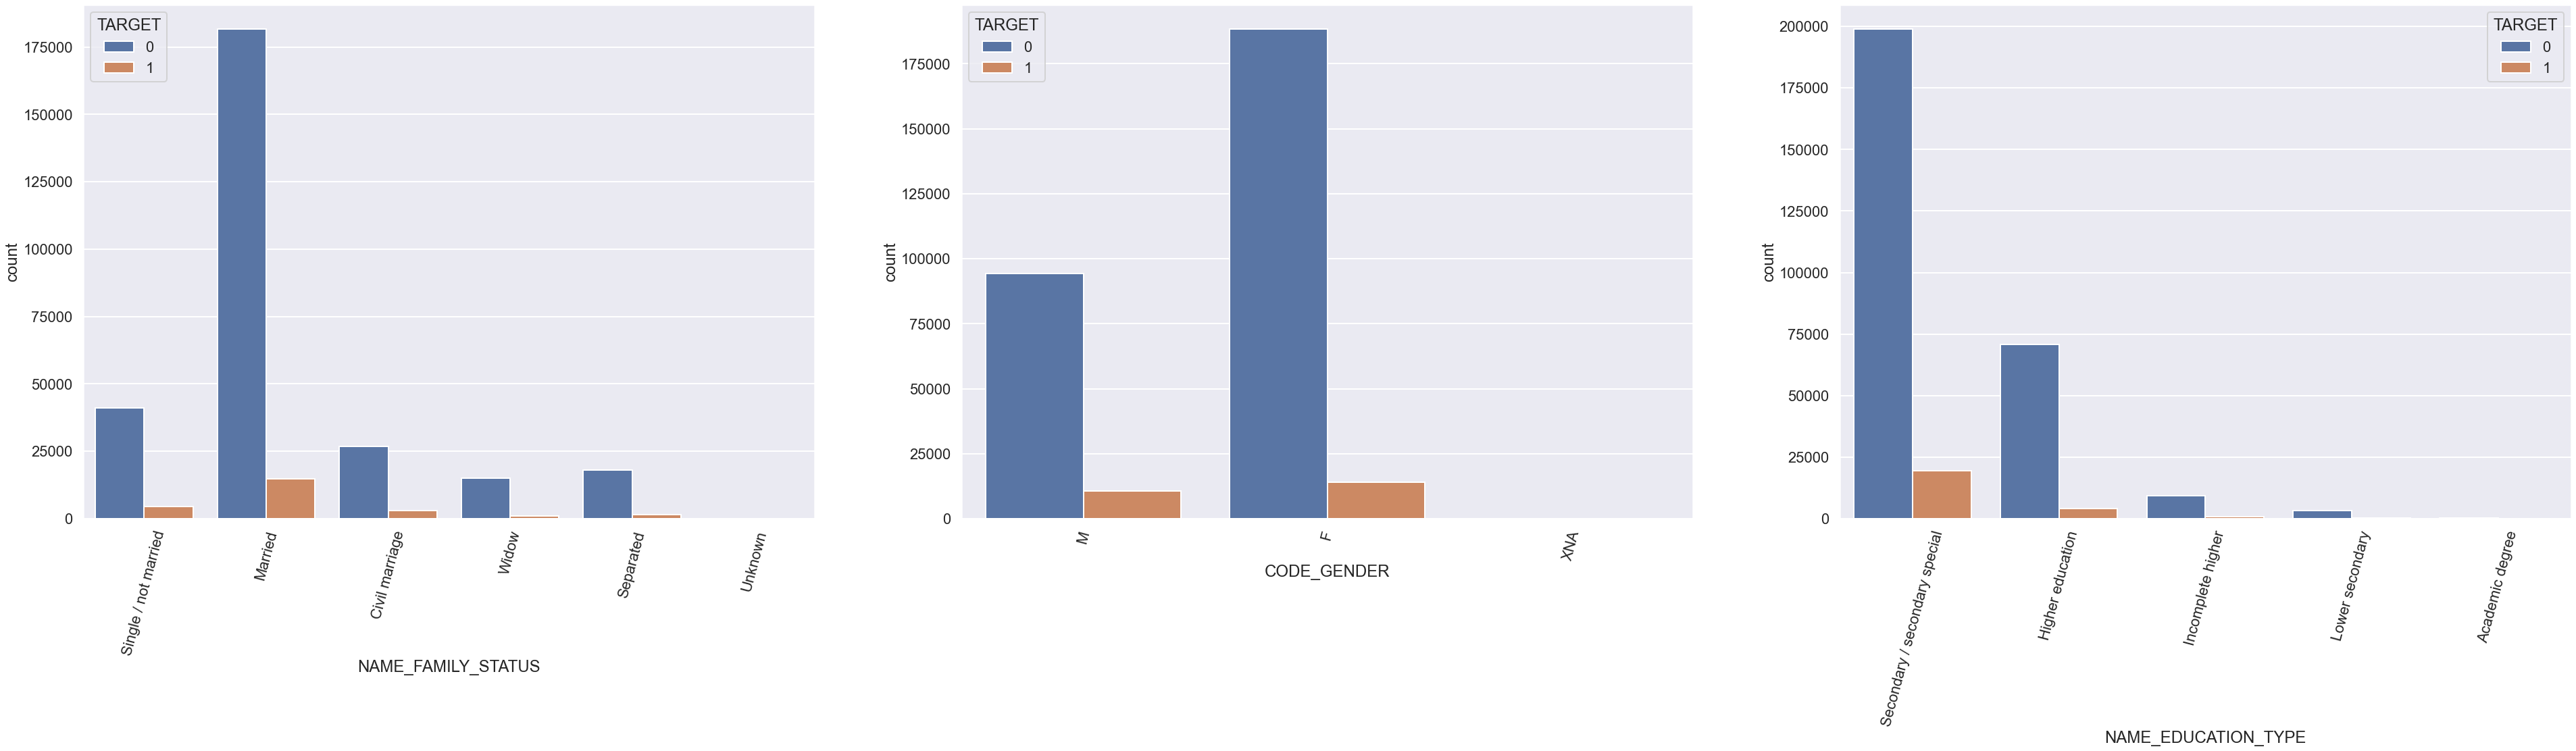

In [110]:
plt.figure(figsize=(66,14))
for i in enumerate(column_names):
    plt.subplot(1,3,i[0]+1)
    sns.countplot(x=i[1],data=current_data,hue='TARGET')
    plt.xticks(rotation=75)

**Approch:**
 - **From the graph "NAME_FAMILY_STATUS", we can conclude that married people tend to take more Loan and are likely to make payment on time as compared to other categories.**
 - **From the graph "CODE_GENDER", Females tend to take more loans compared to males. defaulters count is slightly higher for females compared to males.**
 - **From the graph "NAME_EDUCATION_TYPE", we can conclude that Secondary/secondary special education and Higher Education people are applying for loans in higher numbers and are most likely to make payments on time.**
 - **Women, married people, and those with a secondary or higher education should be given preference by the bank in terms of loans.**

### Continuous Variables Analysis:

In [111]:
## AMT_CREDIT Vs Target Variables ,AMT_INCOME_TOTAL Vs Target Variables,DAYS_BIRTH Vs Target Variables 

column_names1 = ['AMT_CREDIT_PARTS','AMT_INCOME_TOTAL_PARTS','YEARS_BIRTH_PARTS']
list(enumerate(column_names1))

[(0, 'AMT_CREDIT_PARTS'),
 (1, 'AMT_INCOME_TOTAL_PARTS'),
 (2, 'YEARS_BIRTH_PARTS')]

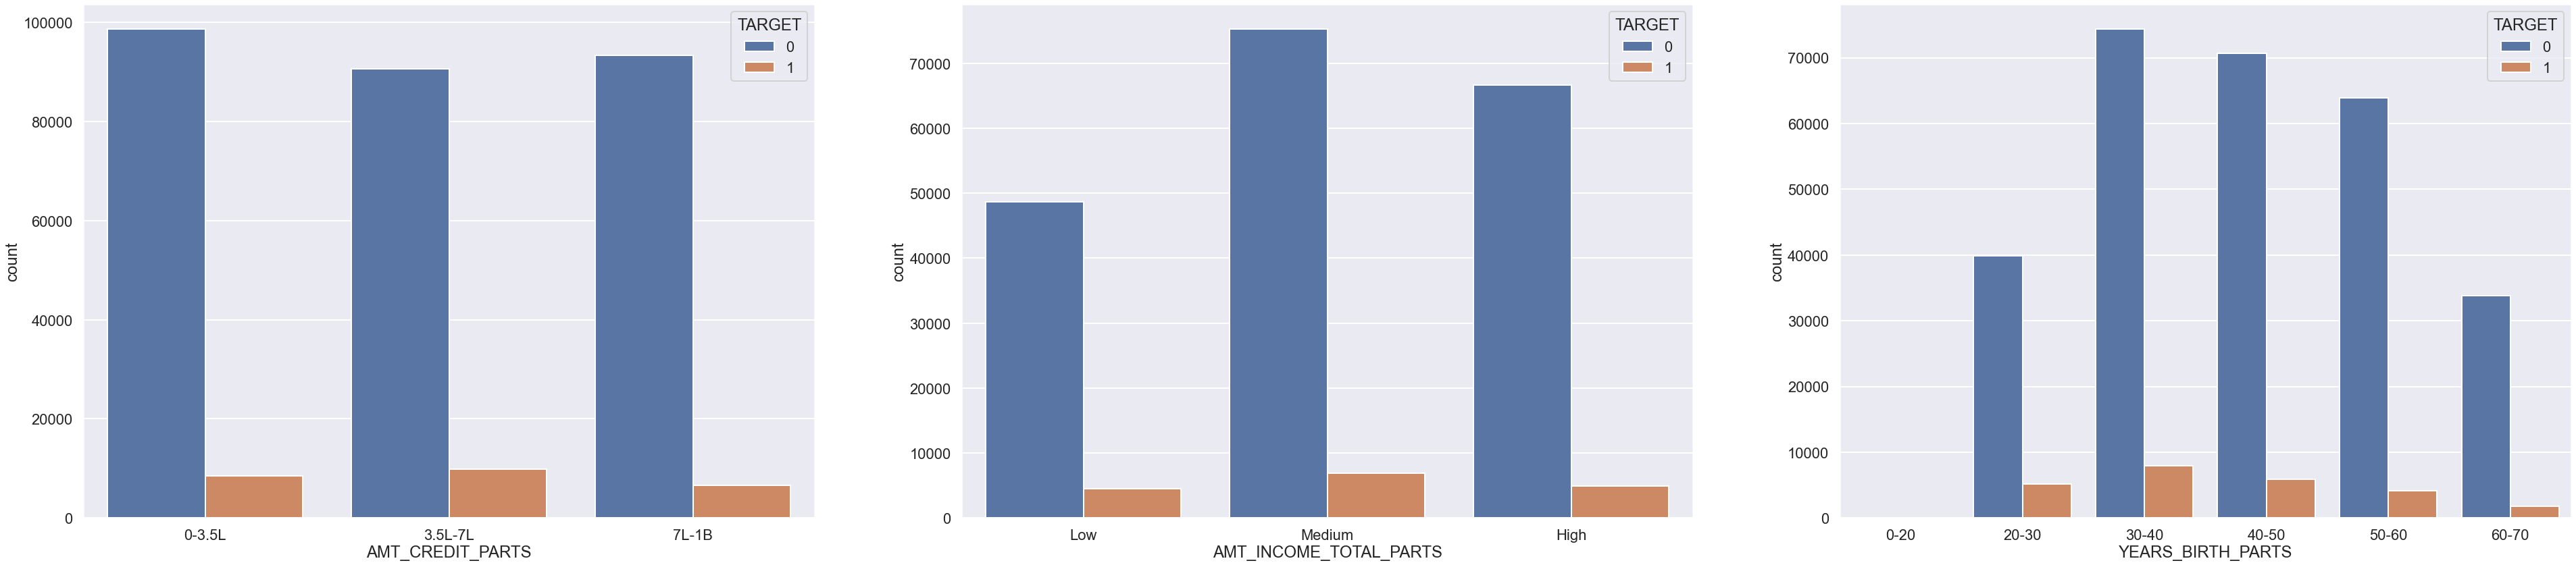

In [112]:
plt.figure(figsize=(66,14))
for i in enumerate(column_names1):
    plt.subplot(1,3,i[0]+1)
    sns.countplot(x=i[1],data=current_data,hue='TARGET')
    plt.xticks(rotation=0)

**Approch:**
 - **From the graph "AMT_CREDIT_PARTS", we can conclude that clients are taking a loan between 0-3.5L and are more likely to make their payments on time. A client with a credit limit between 3.5-7L is most likely to default.**
 - **From the graph "AMT_INCOME_TOTAL_PARTS", we can conclude that clients having a medium-income are more likely to default.**
 - **From the graph "YEARS_BIRTH_PARTS", we can conclude that clients age range between 30-50 takes more loan and are more likely to make their payments on time.**
 - **It would be beneficial for the bank to give preference to clients with medium incomes, a credit limit of 0-3.5L, and a range of 30-50 years of age.**

## Bivariate Analysis: Categorical and Numerical Data Vs Target Variables

In [113]:
current_data[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']]

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT            NAME_EDUCATION_TYPE  \
0            1          202500.0    406597.5  Secondary / secondary special   
1            0          270000.0   1293502.5               Higher education   
2            0           67500.0    135000.0  Secondary / secondary special   
3            0          135000.0    312682.5  Secondary / secondary special   
4            0          121500.0    513000.0  Secondary / secondary special   
...        ...               ...         ...                            ...   
307506       0          157500.0    254700.0  Secondary / secondary special   
307507       0           72000.0    269550.0  Secondary / secondary special   
307508       0          153000.0    677664.0               Higher education   
307509       1          171000.0    370107.0  Secondary / secondary special   
307510       0          157500.0    675000.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 5 columns]

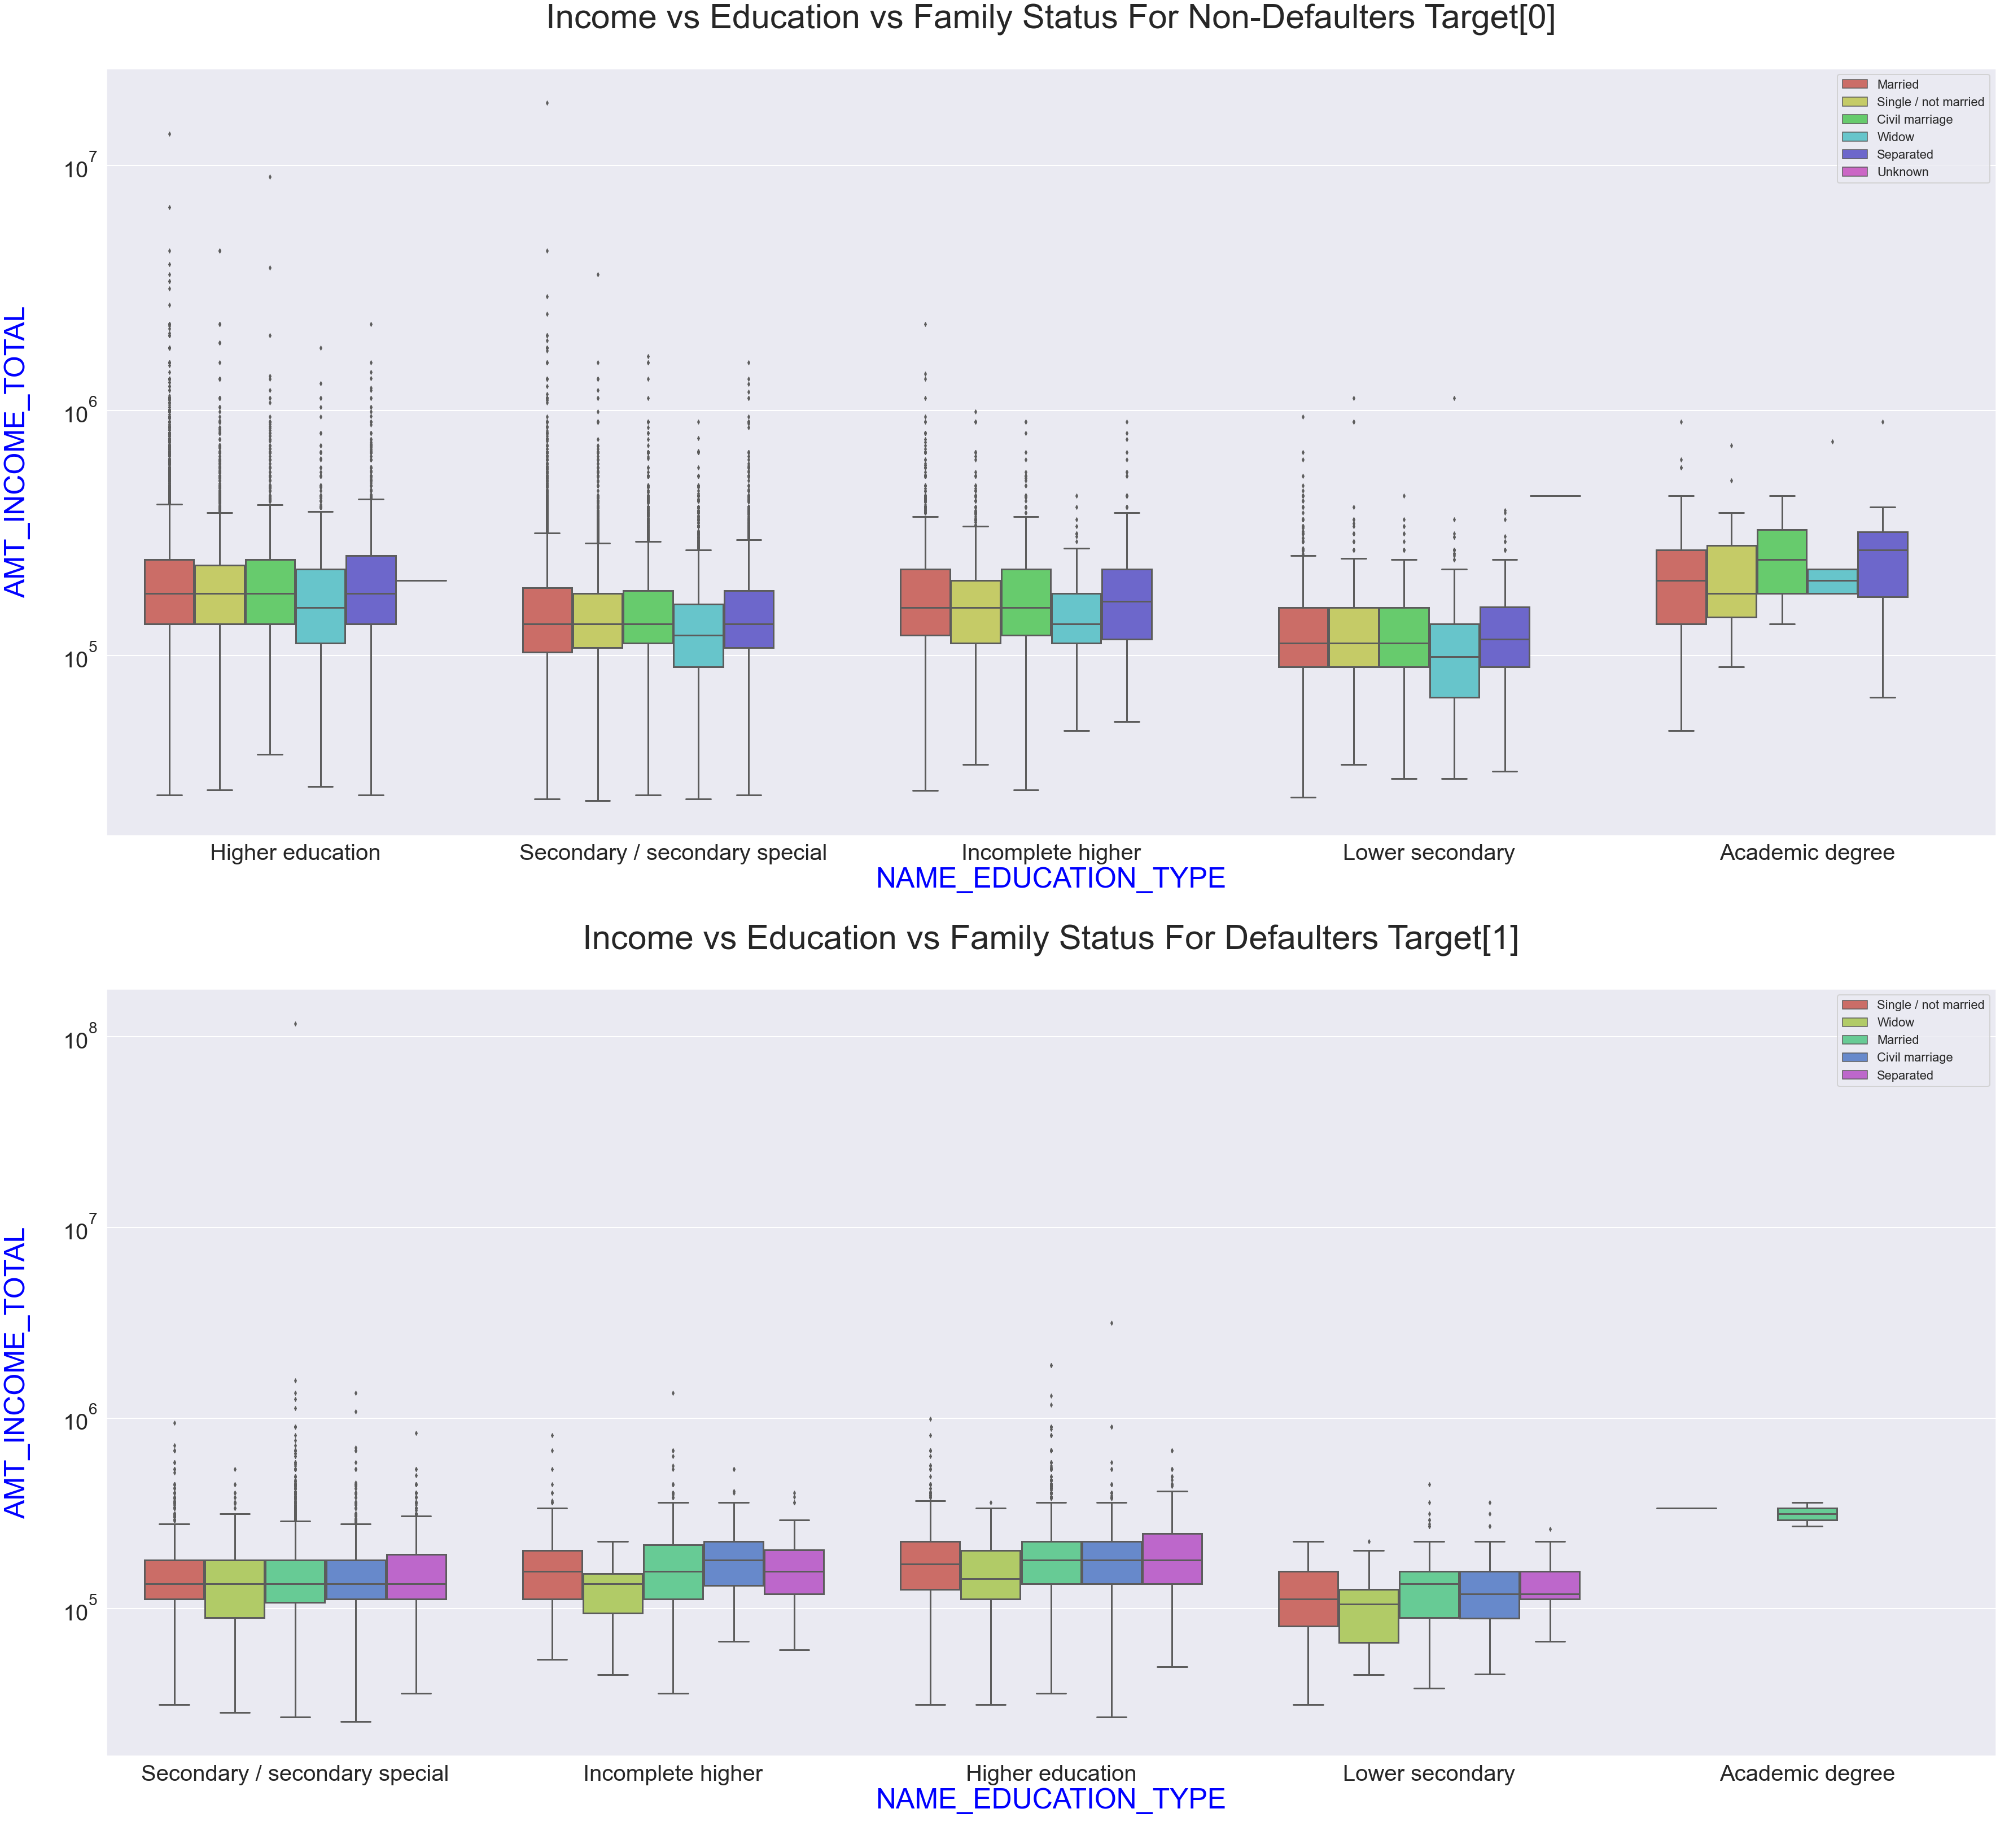

In [114]:
## AMT_INCOME_TOTAL Vs NAME_EDUCATION_TYPE Vs NAME_FAMILY_STATUS among Target variables

plt.figure(figsize=[60,55]) 

plt.subplot(2,1,1)
plt.yscale('log')
sns.boxplot(data =current_data_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='hls')
plt.legend( loc = 'upper right')                                     
plt.title('Income vs Education vs Family Status For Non-Defaulters Target[0]\n',fontsize = 60)
plt.xlabel("NAME_EDUCATION_TYPE\n",fontsize = 50,color = 'Blue')
plt.ylabel("AMT_INCOME_TOTAL\n",fontsize = 50, color = 'Blue')
plt.xticks(fontsize=40)
plt.yticks(rotation=360, fontsize=40)

plt.subplot(2,1,2)
plt.yscale('log')
sns.boxplot(data =current_data_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='hls')
plt.legend( loc = 'upper right')                                     
plt.title('Income vs Education vs Family Status For Defaulters Target[1]\n',fontsize = 60)
plt.xlabel("NAME_EDUCATION_TYPE\n",fontsize = 50,color = 'Blue')
plt.ylabel("AMT_INCOME_TOTAL\n",fontsize = 50, color = 'Blue')
plt.xticks(fontsize=40)
plt.yticks(rotation=360, fontsize=40)

plt.show()

**Approch:**

 - **Non-Defaulters - Target [0]**
     - **Clients with all types of academic degrees have very few outliers, and of those widows, the client does not fall in the First and Third Quartile.**
     - **A higher number of outliers can be seen in Higher Education, Secondary Special, Incomplete Higher, and Lower Secondary.**
     - **Married clients with a High Education or Secondary Specialized tend to earn more money.**
     
        
 - **Defaulters - Target [1]**
     - **The income of Married clients with an academic degree is much less than that of others.**
     - **Comparing Defaulters to Non-Defaulters, their incomes are relatively lower.**


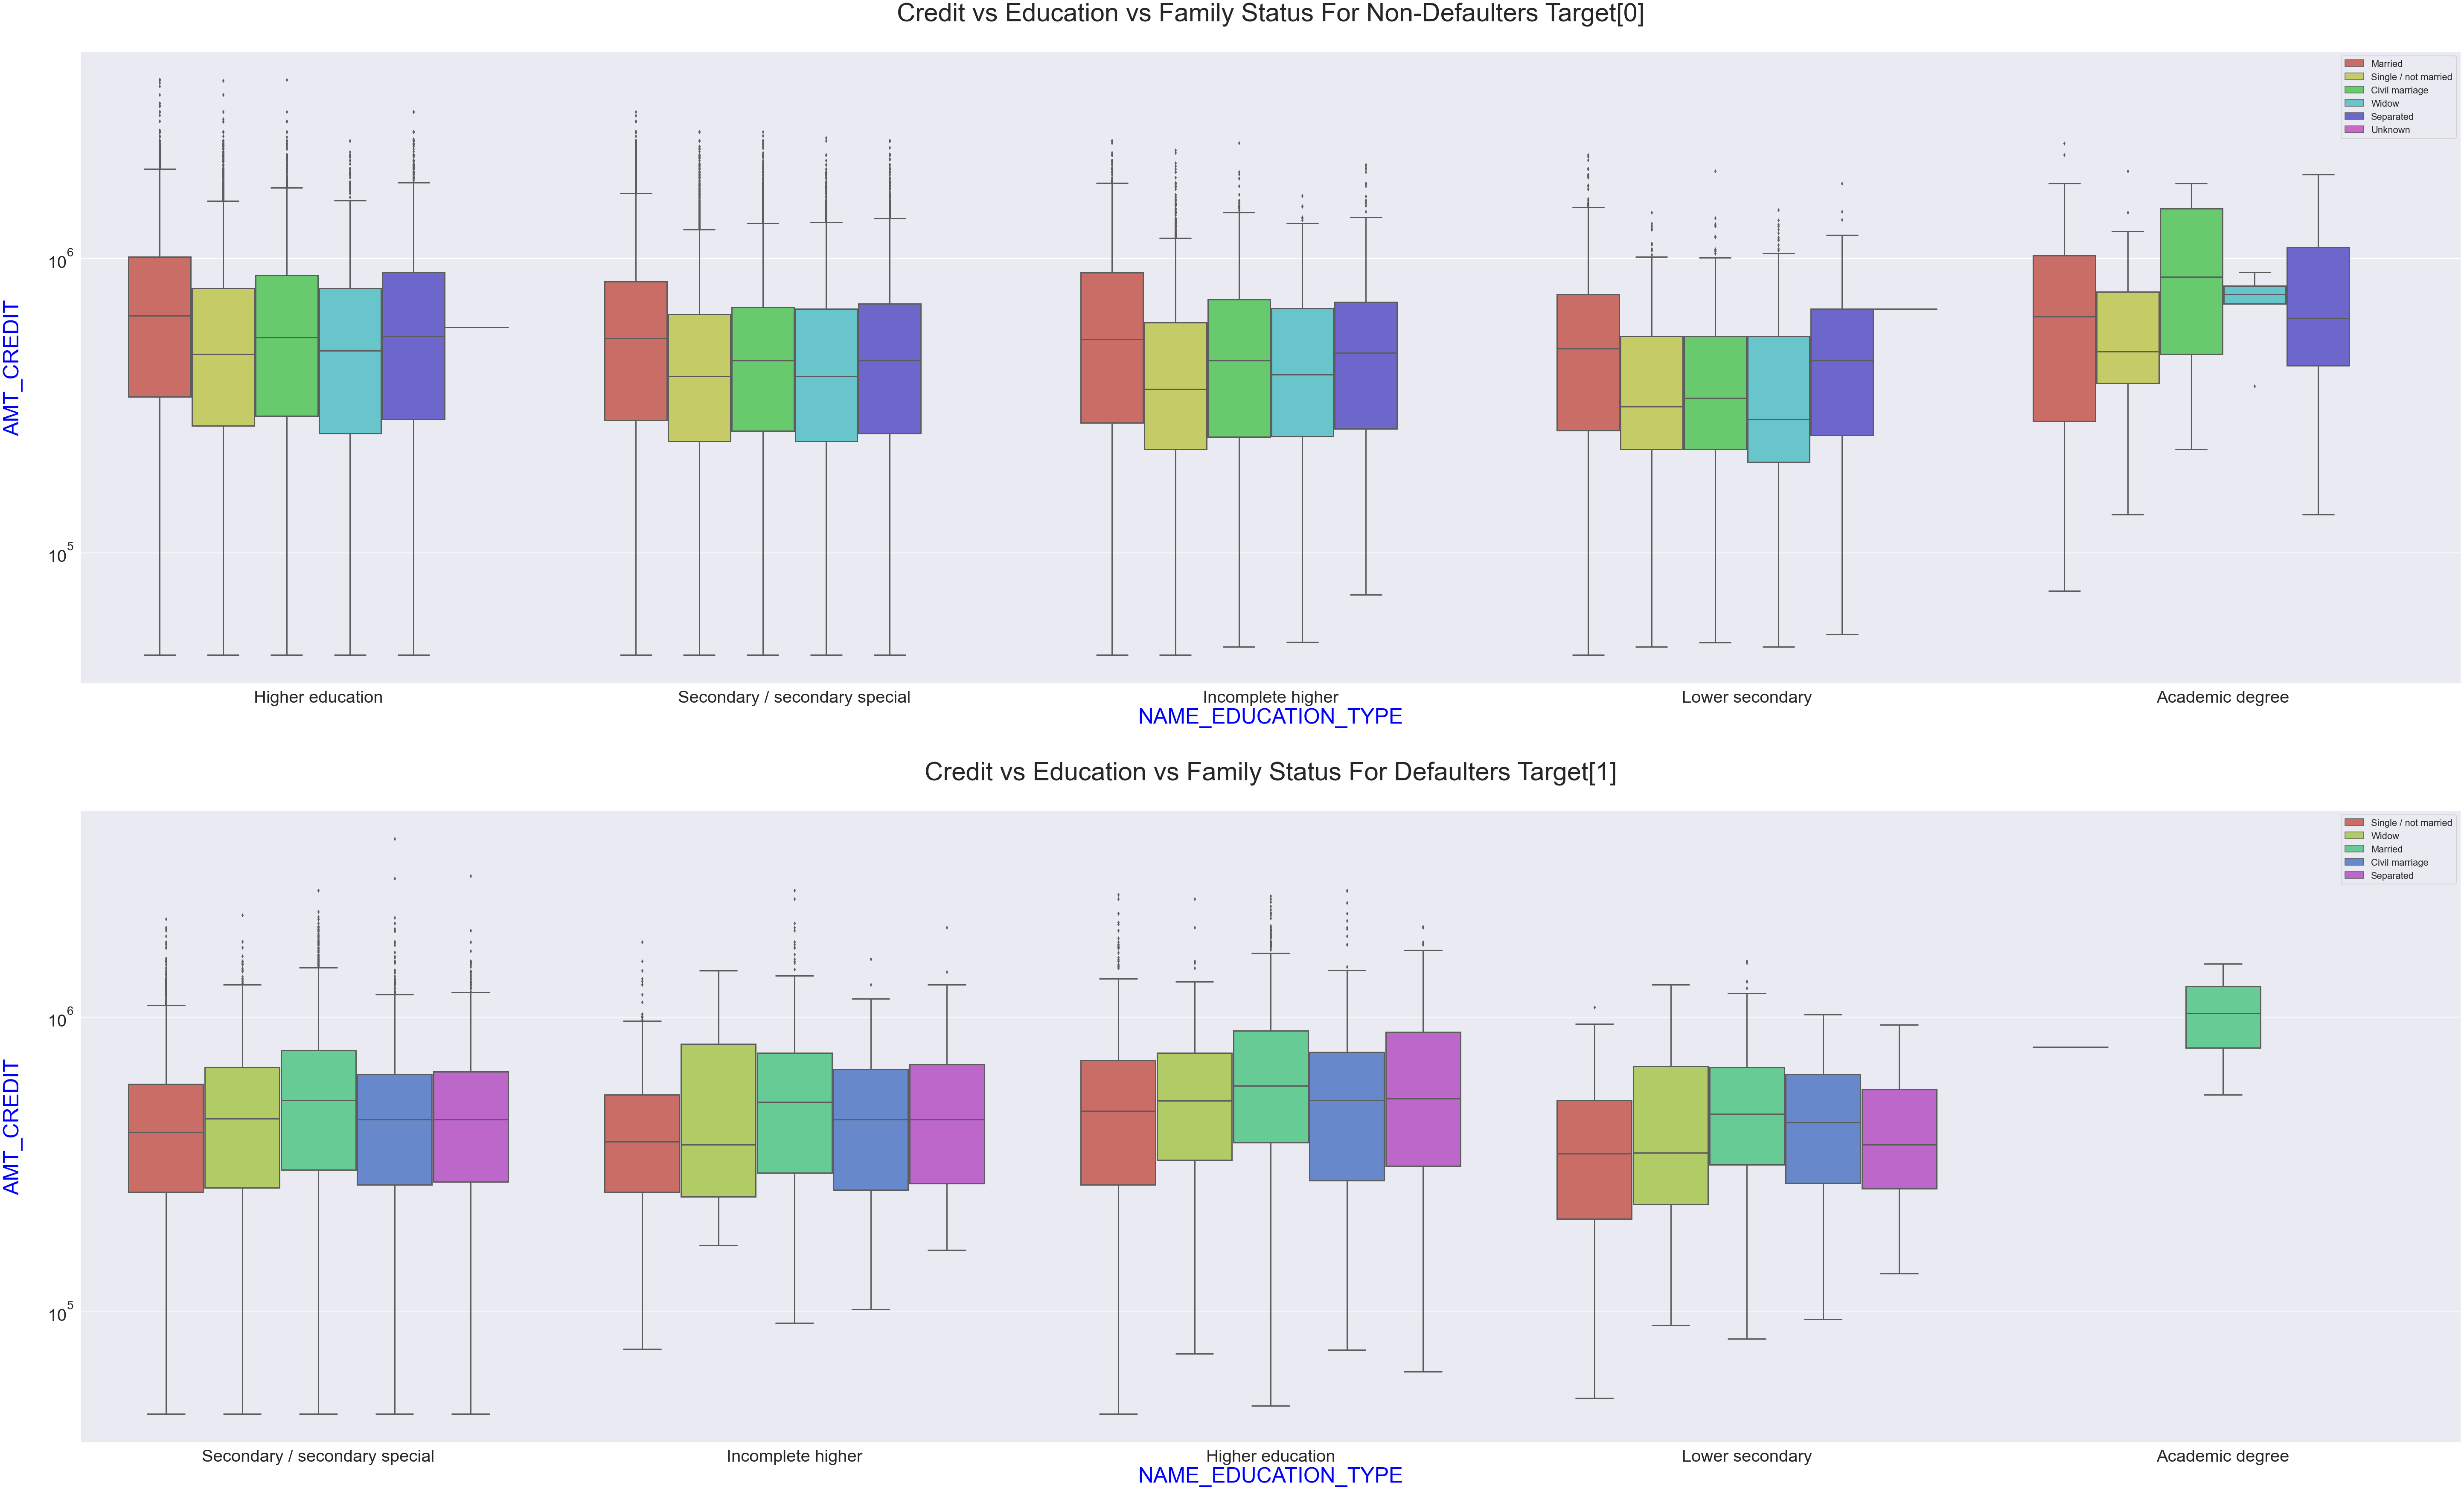

In [115]:
## AMT_CREDIT Vs NAME_EDUCATION_TYPE Vs NAME_FAMILY_STATUS among Target variables

plt.figure(figsize=[100,60]) 

plt.subplot(2,1,1)
plt.yscale('log')
sns.boxplot(data =current_data_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='hls')
plt.legend( loc = 'upper right')                                     
plt.title('Credit vs Education vs Family Status For Non-Defaulters Target[0]\n',fontsize = 60)
plt.xlabel("NAME_EDUCATION_TYPE\n",fontsize = 50,color = 'Blue')
plt.ylabel("AMT_CREDIT\n",fontsize = 50, color = 'Blue')
plt.xticks(fontsize=40)
plt.yticks(rotation=360, fontsize=40)

plt.subplot(2,1,2)
plt.yscale('log')
sns.boxplot(data =current_data_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='hls')
plt.legend( loc = 'upper right')                                     
plt.title('Credit vs Education vs Family Status For Defaulters Target[1]\n',fontsize = 60)
plt.xlabel("NAME_EDUCATION_TYPE\n",fontsize = 50,color = 'Blue')
plt.ylabel("AMT_CREDIT\n",fontsize = 50, color = 'Blue')
plt.xticks(fontsize=40)
plt.yticks(rotation=360, fontsize=40)

plt.show()

**Approch:**

 - **Non-Defaulters - Target [0]**
     - **Outliers are more common among clients with any type of education except academic degrees.**
     - **Clients who are married and with different educational backgrounds tend to have a wide variety of credit loan options available to them.**
        
 - **Defaulters - Target[1]**
     - **An academically qualified married client applied for a higher credit loan and had no outliers.**
     - **Clients with Higher Education, Incomplete Higher Education, Lower Secondary Education, and Secondary/Secondary Special Education might take out a high amount of debts.**

### Finding the Correlations for the Target variables:

In [116]:
correlation_current_data_0 = current_data_0.corr()

In [117]:
correlation_current_data_0

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.000716   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL               0.001739     NaN      0.027397   
AMT_CREDIT                    -0.000342     NaN      0.003081   
AMT_ANNUITY                    0.000096     NaN      0.020949   
AMT_GOODS_PRICE               -0.000378     NaN     -0.000723   
REGION_POPULATION_RELATIVE     0.000360     NaN     -0.024363   
DAYS_BIRTH                     0.001346     NaN     -0.336966   
DAYS_EMPLOYED                  0.001744     NaN     -0.245174   
DAYS_REGISTRATION              0.001475     NaN     -0.185792   
DAYS_ID_PUBLISH                0.000077     NaN      0.028751   
FLAG_MOBIL                     0.002925     NaN      0.001080   
FLAG_EMP_PHONE                -0.001717     NaN      0.244274   
FLAG_WORK_PHONE               -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE               0.003319     NaN     -0.001201   
FLAG_PHONE                     0.001408     NaN     -0.029929   
FLAG_EMAIL                     0.000229     NaN      0.023460   
CNT_FAM_MEMBERS               -0.002782     NaN      0.878563   
REGION_RATING_CLIENT          -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY   -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START       -0.000115     NaN     -0.005244   
REG_REGION_NOT_LIVE_REGION     0.000104     NaN     -0.012342   
REG_REGION_NOT_WORK_REGION     0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION    0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY        -0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY        -0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY        0.000428     NaN      0.070988   
EXT_SOURCE_2                   0.001783     NaN     -0.015308   
EXT_SOURCE_3                   0.000300     NaN     -0.037168   
OBS_30_CNT_SOCIAL_CIRCLE      -0.000697     NaN      0.014532   
DEF_30_CNT_SOCIAL_CIRCLE       0.000553     NaN     -0.002193   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000743     NaN      0.014199   
DEF_60_CNT_SOCIAL_CIRCLE       0.002375     NaN     -0.002125   
DAYS_LAST_PHONE_CHANGE         0.001004     NaN      0.008503   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001774     NaN      0.000147   
AMT_REQ_CREDIT_BUREAU_DAY     -0.001626     NaN      0.001057   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002298     NaN     -0.000315   
AMT_REQ_CREDIT_BUREAU_MON     -0.000037     NaN     -0.007640   
AMT_REQ_CREDIT_BUREAU_QRT      0.000963     NaN     -0.004218   
AMT_REQ_CREDIT_BUREAU_YEAR     0.004055     NaN     -0.039888   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.001739   -0.000342     0.000096   
TARGET                                    NaN         NaN          NaN   
CNT_CHILDREN                         0.027397    0.003081     0.020949   
AMT_INCOME_TOTAL                     1.000000    0.342799     0.418906   
AMT_CREDIT                           0.342799    1.000000     0.771248   
AMT_ANNUITY                          0.418906    0.771248     1.000000   
AMT_GOODS_PRICE                      0.349473    0.986966     0.776624   
REGION_POPULATION_RELATIVE           0.167851    0.100604     0.120899   
DAYS_BIRTH                          -0.062609    0.047378    -0.012233   
DAYS_EMPLOYED                       -0.140392   -0.070104    -0.104933   
DAYS_REGISTRATION                   -0.064937   -0.013477    -0.039437   
DAYS_ID_PUBLISH                     -0.022896    0.001464    -0.014097   
FLAG_MOBIL                           0.000733    0.001498     0.000161   
FLAG_EMP_PHONE                       0.140744    0.071257     0.105599   
FLAG_WORK_PHONE                     -0.032404   -0.017119    -0.022492   
FLAG_CONT_MOBILE                    -0.018814    0.023096     0.021392   
FLAG_PHONE                           0.0

In [118]:
correlation_current_data_1 = current_data_1.corr()

In [119]:
correlation_current_data_1

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.005144   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL              -0.010165     NaN      0.004796   
AMT_CREDIT                    -0.001290     NaN     -0.001675   
AMT_ANNUITY                   -0.007578     NaN      0.031257   
AMT_GOODS_PRICE               -0.001801     NaN     -0.008122   
REGION_POPULATION_RELATIVE     0.006301     NaN     -0.031975   
DAYS_BIRTH                     0.001254     NaN     -0.259109   
DAYS_EMPLOYED                 -0.005161     NaN     -0.192864   
DAYS_REGISTRATION             -0.006342     NaN     -0.149154   
DAYS_ID_PUBLISH                0.002539     NaN      0.032299   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                 0.005248     NaN      0.192469   
FLAG_WORK_PHONE                0.004970     NaN      0.051712   
FLAG_CONT_MOBILE              -0.003039     NaN      0.003592   
FLAG_PHONE                     0.018246     NaN     -0.024306   
FLAG_EMAIL                     0.000831     NaN      0.013902   
CNT_FAM_MEMBERS               -0.003816     NaN      0.885484   
REGION_RATING_CLIENT          -0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY   -0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START        0.005004     NaN     -0.023899   
REG_REGION_NOT_LIVE_REGION    -0.004249     NaN     -0.024322   
REG_REGION_NOT_WORK_REGION     0.004120     NaN     -0.020793   
LIVE_REGION_NOT_WORK_REGION    0.004303     NaN     -0.012073   
REG_CITY_NOT_LIVE_CITY         0.008328     NaN     -0.001174   
REG_CITY_NOT_WORK_CITY         0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY       -0.002929     NaN      0.053515   
EXT_SOURCE_2                   0.006565     NaN     -0.012597   
EXT_SOURCE_3                  -0.004666     NaN     -0.023625   
OBS_30_CNT_SOCIAL_CIRCLE      -0.009424     NaN      0.025909   
DEF_30_CNT_SOCIAL_CIRCLE      -0.005567     NaN      0.001520   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009087     NaN      0.025285   
DEF_60_CNT_SOCIAL_CIRCLE      -0.009440     NaN     -0.005039   
DAYS_LAST_PHONE_CHANGE        -0.002455     NaN     -0.011547   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.011106     NaN      0.000316   
AMT_REQ_CREDIT_BUREAU_DAY     -0.007388     NaN     -0.011255   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.003075     NaN     -0.009316   
AMT_REQ_CREDIT_BUREAU_MON      0.005180     NaN     -0.008852   
AMT_REQ_CREDIT_BUREAU_QRT     -0.001614     NaN     -0.013029   
AMT_REQ_CREDIT_BUREAU_YEAR     0.007970     NaN     -0.031838   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          -0.010165   -0.001290    -0.007578   
TARGET                                    NaN         NaN          NaN   
CNT_CHILDREN                         0.004796   -0.001675     0.031257   
AMT_INCOME_TOTAL                     1.000000    0.038131     0.046421   
AMT_CREDIT                           0.038131    1.000000     0.752195   
AMT_ANNUITY                          0.046421    0.752195     1.000000   
AMT_GOODS_PRICE                      0.037647    0.982854     0.752891   
REGION_POPULATION_RELATIVE           0.009135    0.069161     0.071690   
DAYS_BIRTH                          -0.003096    0.135316     0.014303   
DAYS_EMPLOYED                       -0.014977    0.001930    -0.081207   
DAYS_REGISTRATION                   -0.000158    0.025854    -0.034279   
DAYS_ID_PUBLISH                      0.004215    0.052329     0.016767   
FLAG_MOBIL                                NaN         NaN          NaN   
FLAG_EMP_PHONE                       0.014971   -0.000660     0.081797   
FLAG_WORK_PHONE                     -0.012146   -0.059601    -0.049845   
FLAG_CONT_MOBILE                    -0.000878    0.031771     0.035656   
FLAG_PHONE                          -0.0

**Approch:**

 - **We have dropped the columns from both the Target Variables in order to get a better correlation, as those columns are not relevant to our analysis.**


In [120]:
current_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  int64   
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_CAR                 282686 non-null  object  
 5   FLAG_OWN_REALTY              282686 non-null  object  
 6   CNT_CHILDREN                 282686 non-null  int64   
 7   AMT_INCOME_TOTAL             282686 non-null  float64 
 8   AMT_CREDIT                   282686 non-null  float64 
 9   AMT_ANNUITY                  282686 non-null  float64 
 10  AMT_GOODS_PRICE              282686 non-null  float64 
 11  NAME_TYPE_SUITE              282686 non-null  object  
 12  NAME_INCOME_TYPE             282686 non-null

In [121]:
## Dropping columns from Target variable 0 and 1

current_data_0.drop(columns=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'],axis=1,inplace=True)
current_data_1.drop(columns=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'],axis=1,inplace=True)

In [122]:
current_data_0.drop(columns=['NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)
current_data_1.drop(columns=['NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [123]:
current_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  282686 non-null  int64   
 1   TARGET                      282686 non-null  int64   
 2   NAME_CONTRACT_TYPE          282686 non-null  object  
 3   CODE_GENDER                 282686 non-null  object  
 4   CNT_CHILDREN                282686 non-null  int64   
 5   AMT_INCOME_TOTAL            282686 non-null  float64 
 6   AMT_CREDIT                  282686 non-null  float64 
 7   AMT_ANNUITY                 282686 non-null  float64 
 8   AMT_GOODS_PRICE             282686 non-null  float64 
 9   NAME_INCOME_TYPE            282686 non-null  object  
 10  NAME_EDUCATION_TYPE         282686 non-null  object  
 11  NAME_FAMILY_STATUS          282686 non-null  object  
 12  NAME_HOUSING_TYPE           282686 non-null  object  
 13 

In [124]:
current_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  24825 non-null  int64   
 1   TARGET                      24825 non-null  int64   
 2   NAME_CONTRACT_TYPE          24825 non-null  object  
 3   CODE_GENDER                 24825 non-null  object  
 4   CNT_CHILDREN                24825 non-null  int64   
 5   AMT_INCOME_TOTAL            24825 non-null  float64 
 6   AMT_CREDIT                  24825 non-null  float64 
 7   AMT_ANNUITY                 24825 non-null  float64 
 8   AMT_GOODS_PRICE             24825 non-null  float64 
 9   NAME_INCOME_TYPE            24825 non-null  object  
 10  NAME_EDUCATION_TYPE         24825 non-null  object  
 11  NAME_FAMILY_STATUS          24825 non-null  object  
 12  NAME_HOUSING_TYPE           24825 non-null  object  
 13  REGION_POPULATI

## Top 10 Coorelation

### Coorelations for Non-Default ( Target Variable [0] )

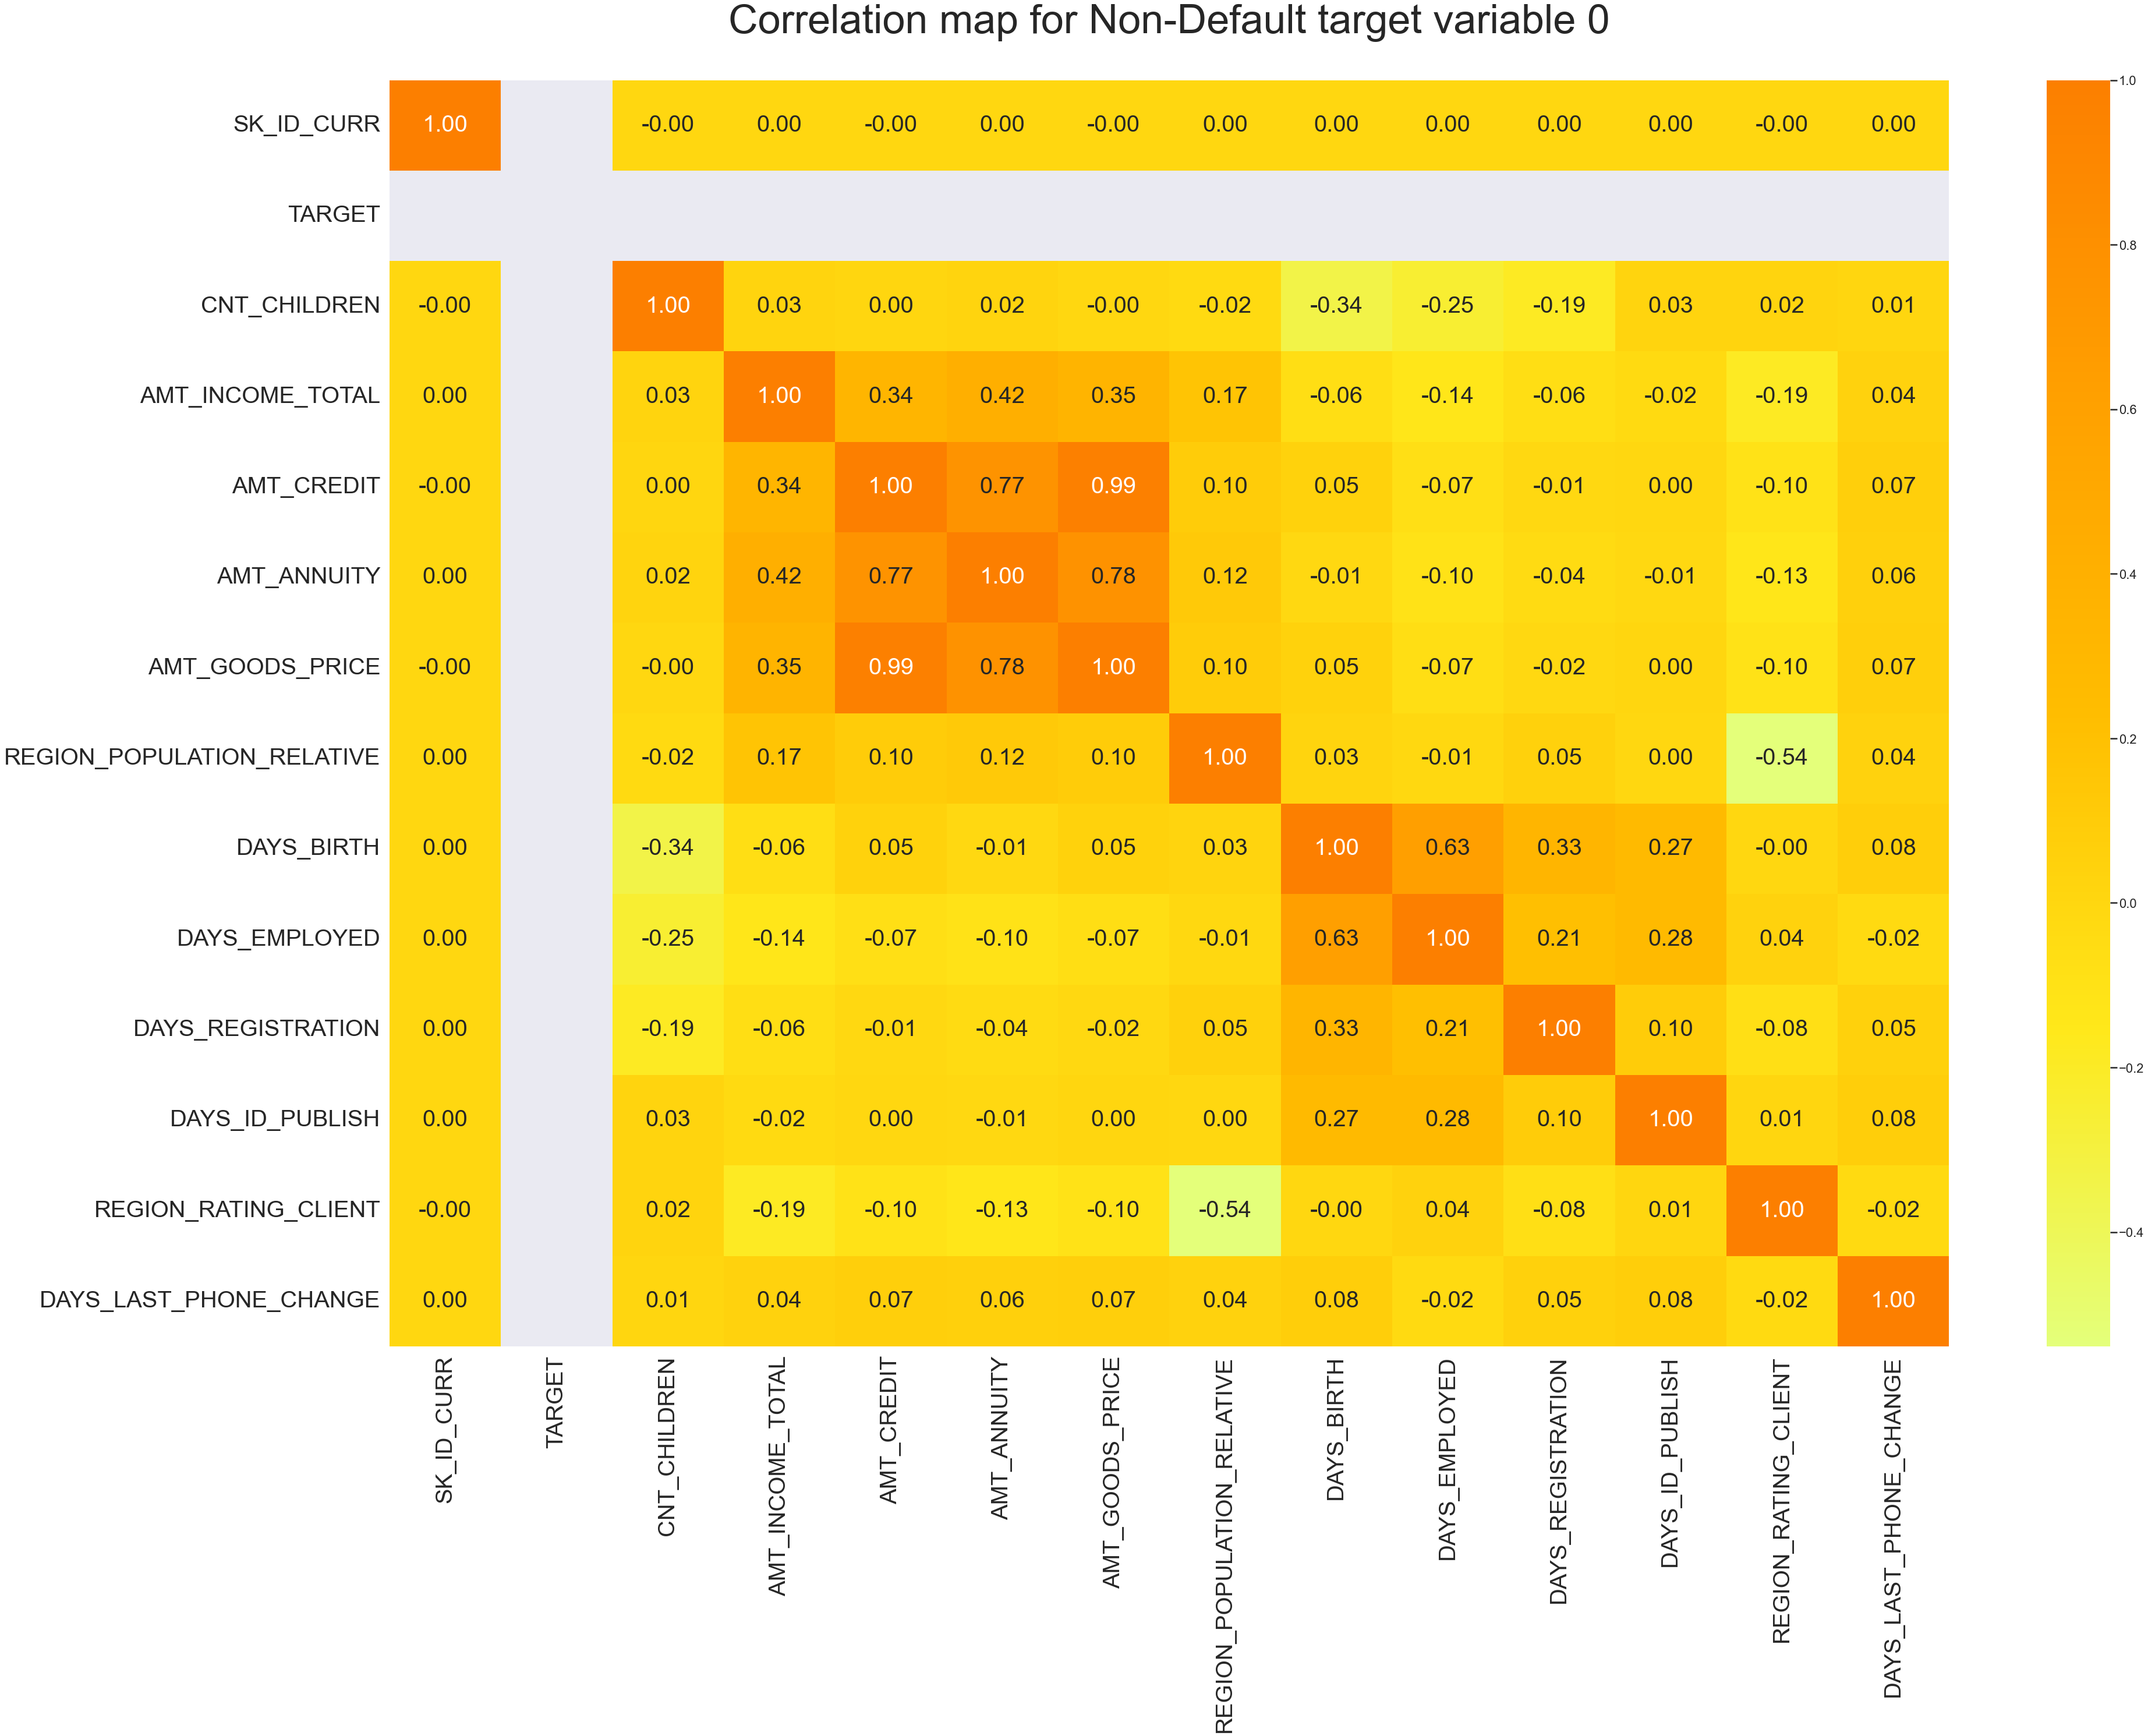

In [125]:
plt.figure(figsize=(60,40)) 
sns.heatmap(current_data_0.corr(),annot=True, fmt='.2f',cmap="Wistia",annot_kws={"size": 40})
plt.title('Correlation map for Non-Default target variable 0\n',fontsize = 70)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [126]:
## Finding Top 10 Coorelations of Non-Default Target Variable [0]

correlation_current_data_0 = current_data_0.corr()
correlation_non_default_0 = correlation_current_data_0.where(np.triu(np.ones(correlation_current_data_0.shape),k=1).astype(np.bool))
correlation_non_default_0 = correlation_non_default_0.unstack().reset_index().dropna(subset=[0])
correlation_non_default_0.columns=['VARIABLE1', 'VARIABLE2', 'Correlation']
correlation_non_default_0['Corr_abs']=abs(correlation_non_default_0['Correlation'])
correlation_non_default_0.sort_values(by="Corr_abs",ascending=False,inplace=True)
correlation_non_default_0.head(10)

VARIABLE1                   VARIABLE2  Correlation  Corr_abs
88        AMT_GOODS_PRICE                  AMT_CREDIT     0.986966  0.986966
89        AMT_GOODS_PRICE                 AMT_ANNUITY     0.776624  0.776624
74            AMT_ANNUITY                  AMT_CREDIT     0.771248  0.771248
134         DAYS_EMPLOYED                  DAYS_BIRTH     0.626114  0.626114
175  REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE    -0.539005  0.539005
73            AMT_ANNUITY            AMT_INCOME_TOTAL     0.418906  0.418906
87        AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.349473  0.349473
59             AMT_CREDIT            AMT_INCOME_TOTAL     0.342799  0.342799
114            DAYS_BIRTH                CNT_CHILDREN    -0.336966  0.336966
148     DAYS_REGISTRATION                  DAYS_BIRTH     0.333151  0.333151

### Coorelations for Default ( Target Variable [1] )

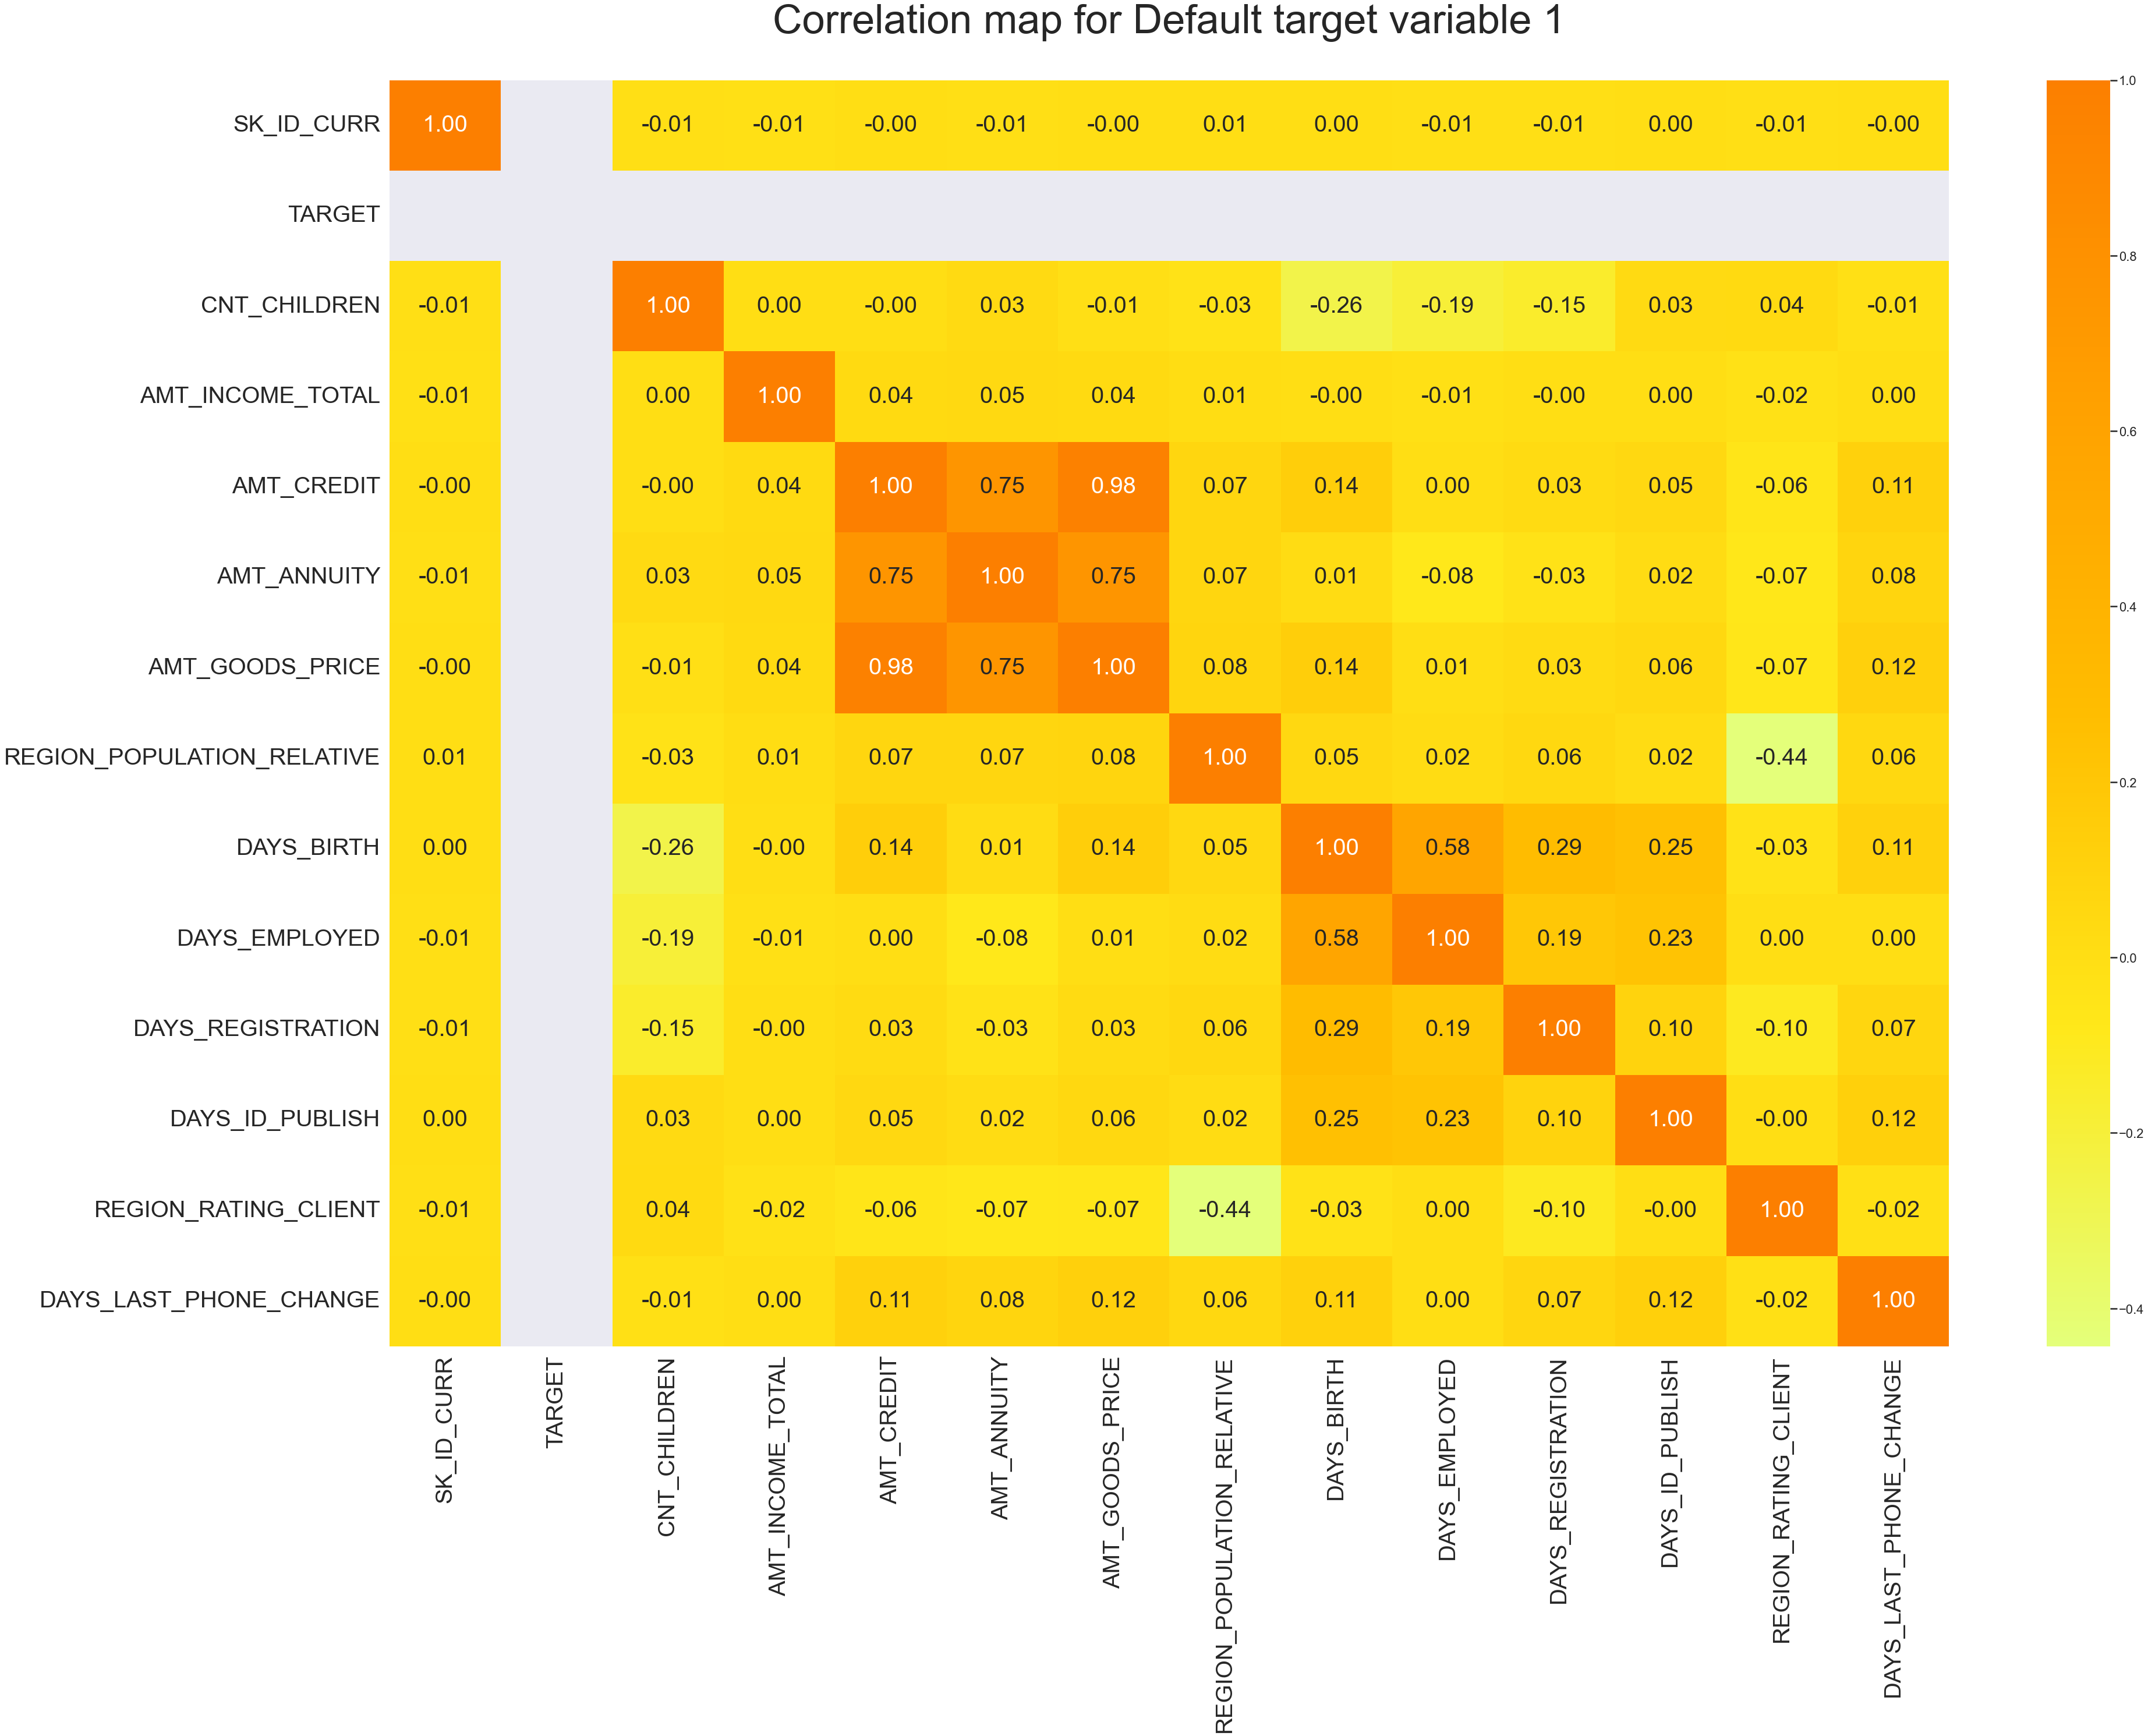

In [127]:
plt.figure(figsize=(60,40)) 
sns.heatmap(current_data_1.corr(),annot=True, fmt='.2f',cmap="Wistia",annot_kws={"size": 40})
plt.title('Correlation map for Default target variable 1\n', fontsize= 70)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [128]:
## Finding Top 10 Coorelations of Default Target Variable [1]

correlation_current_data_1 = current_data_1.corr()
correlation_non_default_1 = correlation_current_data_1.where(np.triu(np.ones(correlation_current_data_1.shape),k=1).astype(np.bool))
correlation_non_default_1 = correlation_non_default_1.unstack().reset_index().dropna(subset=[0])
correlation_non_default_1.columns=['VARIABLE1', 'VARIABLE2', 'Correlation']
correlation_non_default_1['Corr_abs']=abs(correlation_non_default_1['Correlation'])
correlation_non_default_1.sort_values(by="Corr_abs",ascending=False,inplace=True)
correlation_non_default_1.head(10)

VARIABLE1                   VARIABLE2  Correlation  Corr_abs
88        AMT_GOODS_PRICE                  AMT_CREDIT     0.982854  0.982854
89        AMT_GOODS_PRICE                 AMT_ANNUITY     0.752891  0.752891
74            AMT_ANNUITY                  AMT_CREDIT     0.752195  0.752195
134         DAYS_EMPLOYED                  DAYS_BIRTH     0.582185  0.582185
175  REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE    -0.443236  0.443236
148     DAYS_REGISTRATION                  DAYS_BIRTH     0.289114  0.289114
114            DAYS_BIRTH                CNT_CHILDREN    -0.259109  0.259109
162       DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863  0.252863
163       DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.229090  0.229090
128         DAYS_EMPLOYED                CNT_CHILDREN    -0.192864  0.192864

**Approch:**

 - **For Non-Default Target 0 Variables.**
     - **From the heat map and table we get our Top 10 Correlations.**
     - **AMT_GOODS_PRICE is highly correlated with AMT_CREDIT, which has a value of 0.98, and with AMT_ANNUITY, which has a value of 0.77.**
     
- **For Default Target 1 Variables.**
     - **From the heat map and table we get our Top 10 Correlations.**
     - **AMT_GOODS_PRICE is highly correlated with AMT_CREDIT, which has a value of 0.98, and with AMT_ANNUITY, which has a value of 0.75.**
     
        
 - **The Credit amount is the most important factor to Non-Default and Default customers, as the clients get the credit amount they request based on the Goods price they are putting up as security. Another factor is the punctuality of the client to pay the debt on time.**


## Previous Application Dataset Analysis

In [129]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [130]:
previous_data.shape

(1670214, 37)

In [131]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Checking the Duplicate values in the Dataset

In [132]:
## We can clearly seen that there are no duplicates values in the data set.

previous_data.duplicated().sum()

0

In [133]:
## Finding the percentage of null values from all the columns

round(previous_data.isnull().sum()*100/len(previous_data),2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [134]:
## Count the number of columns having the null value

count_null = round(previous_data.isnull().sum()*100/len(previous_data),2)
len(count_null)


37

In [135]:
## Dropping null values from Previous_application which are having null percentage greater than 40

previous_data.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"], axis = 1, inplace = True)

In [136]:
previous_dropped_data = previous_data.isnull().sum()*100/len(previous_data)

In [137]:
round(previous_dropped_data,2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [138]:
previous_data.shape

(1670214, 26)

In [139]:
len(previous_dropped_data)

26

In [140]:
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [141]:
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

In [142]:
previous_data.shape

(69635, 26)

In [143]:
## Converting negative value into positive value for different column

previous_data['DAYS_DECISION']=previous_data['DAYS_DECISION'].abs()
previous_data['SELLERPLACE_AREA']=previous_data['SELLERPLACE_AREA'].abs()

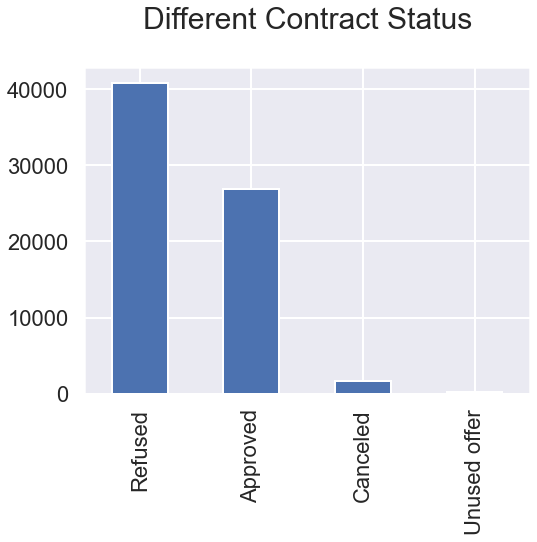

In [144]:
## NAME_CONTRACT_STATUS Plot counting it's value counts
plt.figure(figsize = [8,6])
previous_data.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.title("Different Contract Status\n",fontsize=30)
plt.show()

In [145]:
previous_data.NAME_CONTRACT_STATUS.value_counts()

Refused         40858
Approved        26933
Canceled         1639
Unused offer      205
Name: NAME_CONTRACT_STATUS, dtype: int64

**Approch:**

 - **From the previous data, we found that the number of denied applications is around 40000 and the number of approved applications is about 27000.**

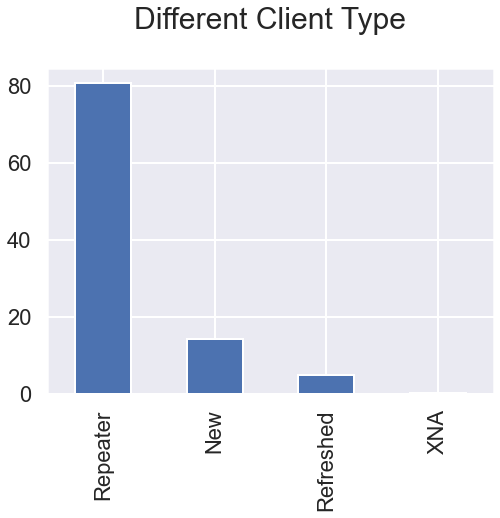

In [146]:
## NAME_CLIENT_TYPE Plot counting it's value counts
plt.figure(figsize = [8,6])
a = previous_data.NAME_CLIENT_TYPE.value_counts(normalize=True)*100
a.plot.bar()
plt.title("Different Client Type\n",fontsize=30)
plt.show()

In [147]:
previous_data.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

Repeater     80.786961
New          14.308896
Refreshed     4.828032
XNA           0.076111
Name: NAME_CLIENT_TYPE, dtype: float64

**Approch:**

 - **From the above data, we found that 80.7% of the clients were repeated clients who applied for loans and 14.3% of the clients were new to the process.**

## Merging the Previous application and Application Data:

In [148]:
Merged_Data_set = pd.merge(left=current_data,right=previous_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [149]:
Merged_Data_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            N   
1      100035       0          Cash loans           F            N   
2      100039       0          Cash loans           M            Y   
3      100046       0     Revolving loans           M            Y   
4      100046       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0           90000.0     180000.0        9000.0   
1               Y             0          292500.0     665892.0       24592.5   
2               N             1          360000.0     733315.5       39069.0   
3               Y             0          180000.0     540000.0       27000.0   
4               Y             0          180000.0     540000.0       27000.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          180000.0   Unaccompanied               Working   
1          477000.0   Unaccompanied  Commercial associate   
2          679500.0   Unaccompanied  Commercial associate   
3          540000.0   Unaccompanied               Working   
4          540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755       10341           1010               4799   
1                    0.025164       15280           2668               5266   
2                    0.015221       11694           2060               3557   
3                    0.025164       16126           1761               8236   
4                    0.025164       16126           1761               8236   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             3015           1               1                0   
1             3787           1               1                0   
2             3557           1               1                0   
3             4292           1               1                0   
4             4292           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Laborers              1.0   
1                 1           0           1        Laborers              2.0   
2                 1           0           0         Drivers              3.0   
3                 1           0           0        Managers              2.0   
4                 1           0           0        Managers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_  HOUR_APPR_PROCESS_START_  \
0                     TUESDAY                        16   
1                   WEDNESDAY                        13   
2                    THURSDAY                        10   
3                     TUESDAY                         8   
4                     TUESDAY                         8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0        

In [150]:
Merged_Data_set.shape

(59413, 81)

In [151]:
Merged_Data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_          59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  object  
 5   FLAG_OWN_REALTY              59413 non-null  object  
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT_                  59413 non-null  float64 
 9   AMT_ANNUITY_                 59413 non-null  float64 
 10  AMT_GOODS_PRICE_             59413 non-null  float64 
 11  NAME_TYPE_SUITE              59413 non-null  object  
 12  NAME_INCOME_TYPE             59413 non-null  object  
 13  N

In [152]:
Merged_Data_set = Merged_Data_set.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV','WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [153]:
Merged_Data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       59413 non-null  int64   
 1   TARGET                           59413 non-null  int64   
 2   NAME_CONTRACT_TYPE               59413 non-null  object  
 3   CODE_GENDER                      59413 non-null  object  
 4   FLAG_OWN_CAR                     59413 non-null  object  
 5   FLAG_OWN_REALTY                  59413 non-null  object  
 6   CNT_CHILDREN                     59413 non-null  int64   
 7   AMT_INCOME_TOTAL                 59413 non-null  float64 
 8   AMT_CREDIT                       59413 non-null  float64 
 9   AMT_ANNUITY                      59413 non-null  float64 
 10  AMT_GOODS_PRICE_                 59413 non-null  float64 
 11  NAME_TYPE_SUITE                  59413 non-null  object  
 12  NAME

## Analysis on Merged Data Set:

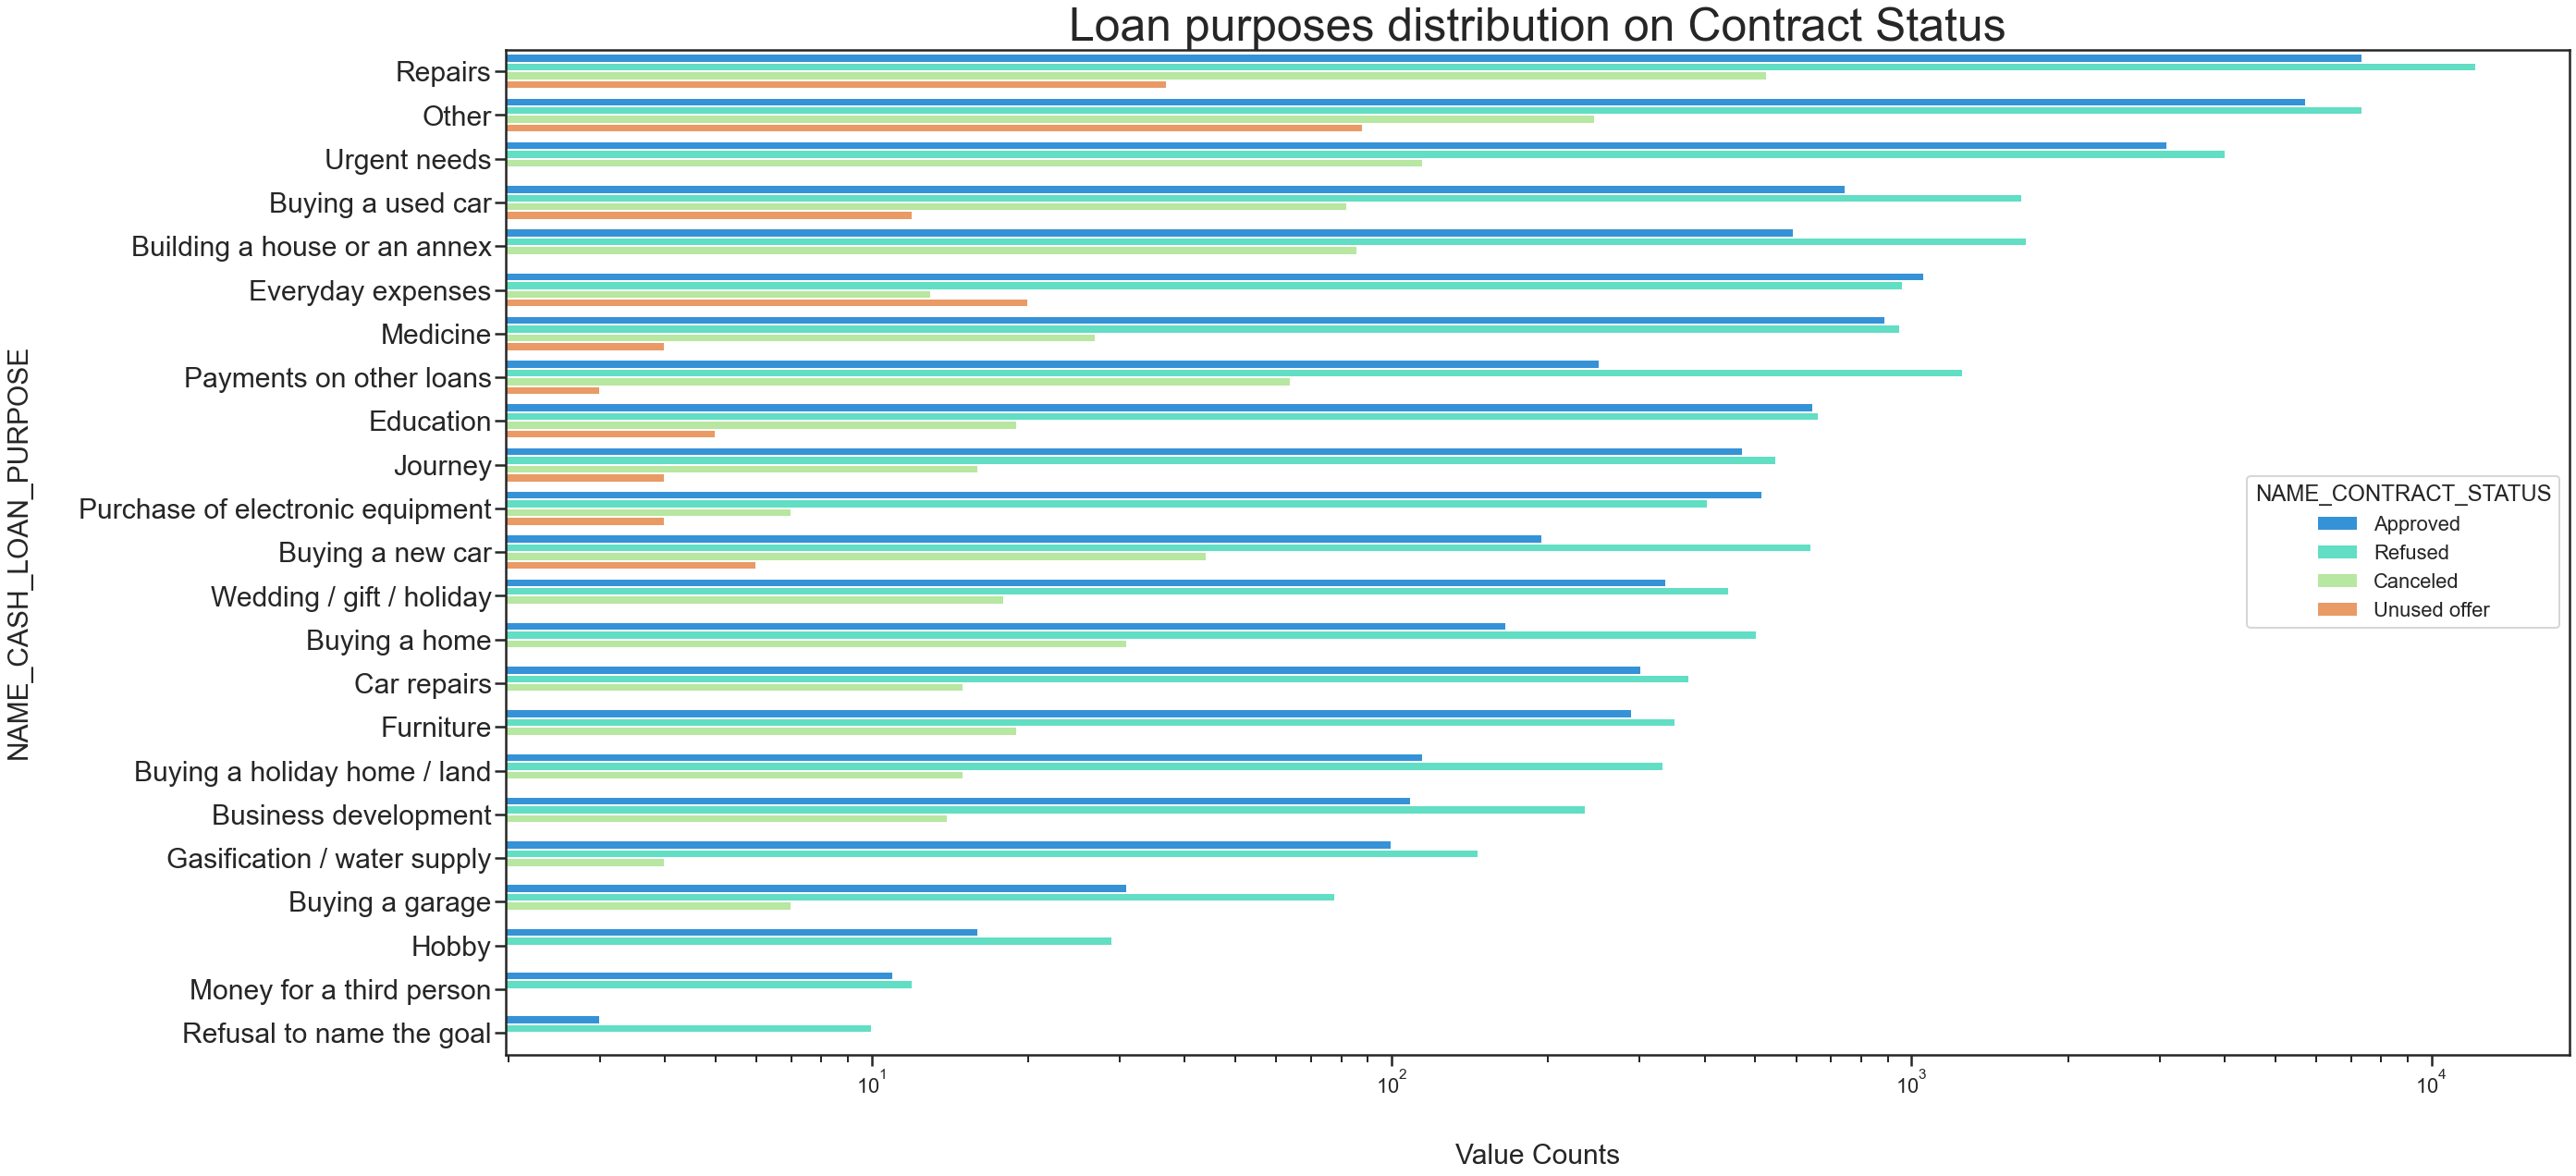

In [154]:
sns.set_style('ticks')
sns.set_context('poster')
plt.figure(figsize=(40,20))
plt.xscale('log')
sns.countplot(data = Merged_Data_set, y= 'NAME_CASH_LOAN_PURPOSE', order=Merged_Data_set['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='rainbow')
plt.title('Loan purposes distribution on Contract Status', fontsize = 50,loc = 'center')
plt.xlabel("Value Counts",labelpad=50,fontsize=30)
plt.ylabel("NAME_CASH_LOAN_PURPOSE",labelpad=50,fontsize=30)
plt.yticks(fontsize=30)
plt.show()

**Approch:**

 - **On the Basis of Contract Status.**
     - **Despite the fact that there are a greater number of rejections for loans given for repair purposes, the number of approvals is higher as well.**
     - **The rejection rate for repayments on other loans, buying a car, and buying a home or vacation home is higher than approval rates.**
     - **The number of approvals and rejections for loans taken for educational and medicinal purposes is equal.**
     - **We can clearly see that there are a significant number of unused loan offers in the other loan purpose, since the clients might not have a reason to take a loan.**

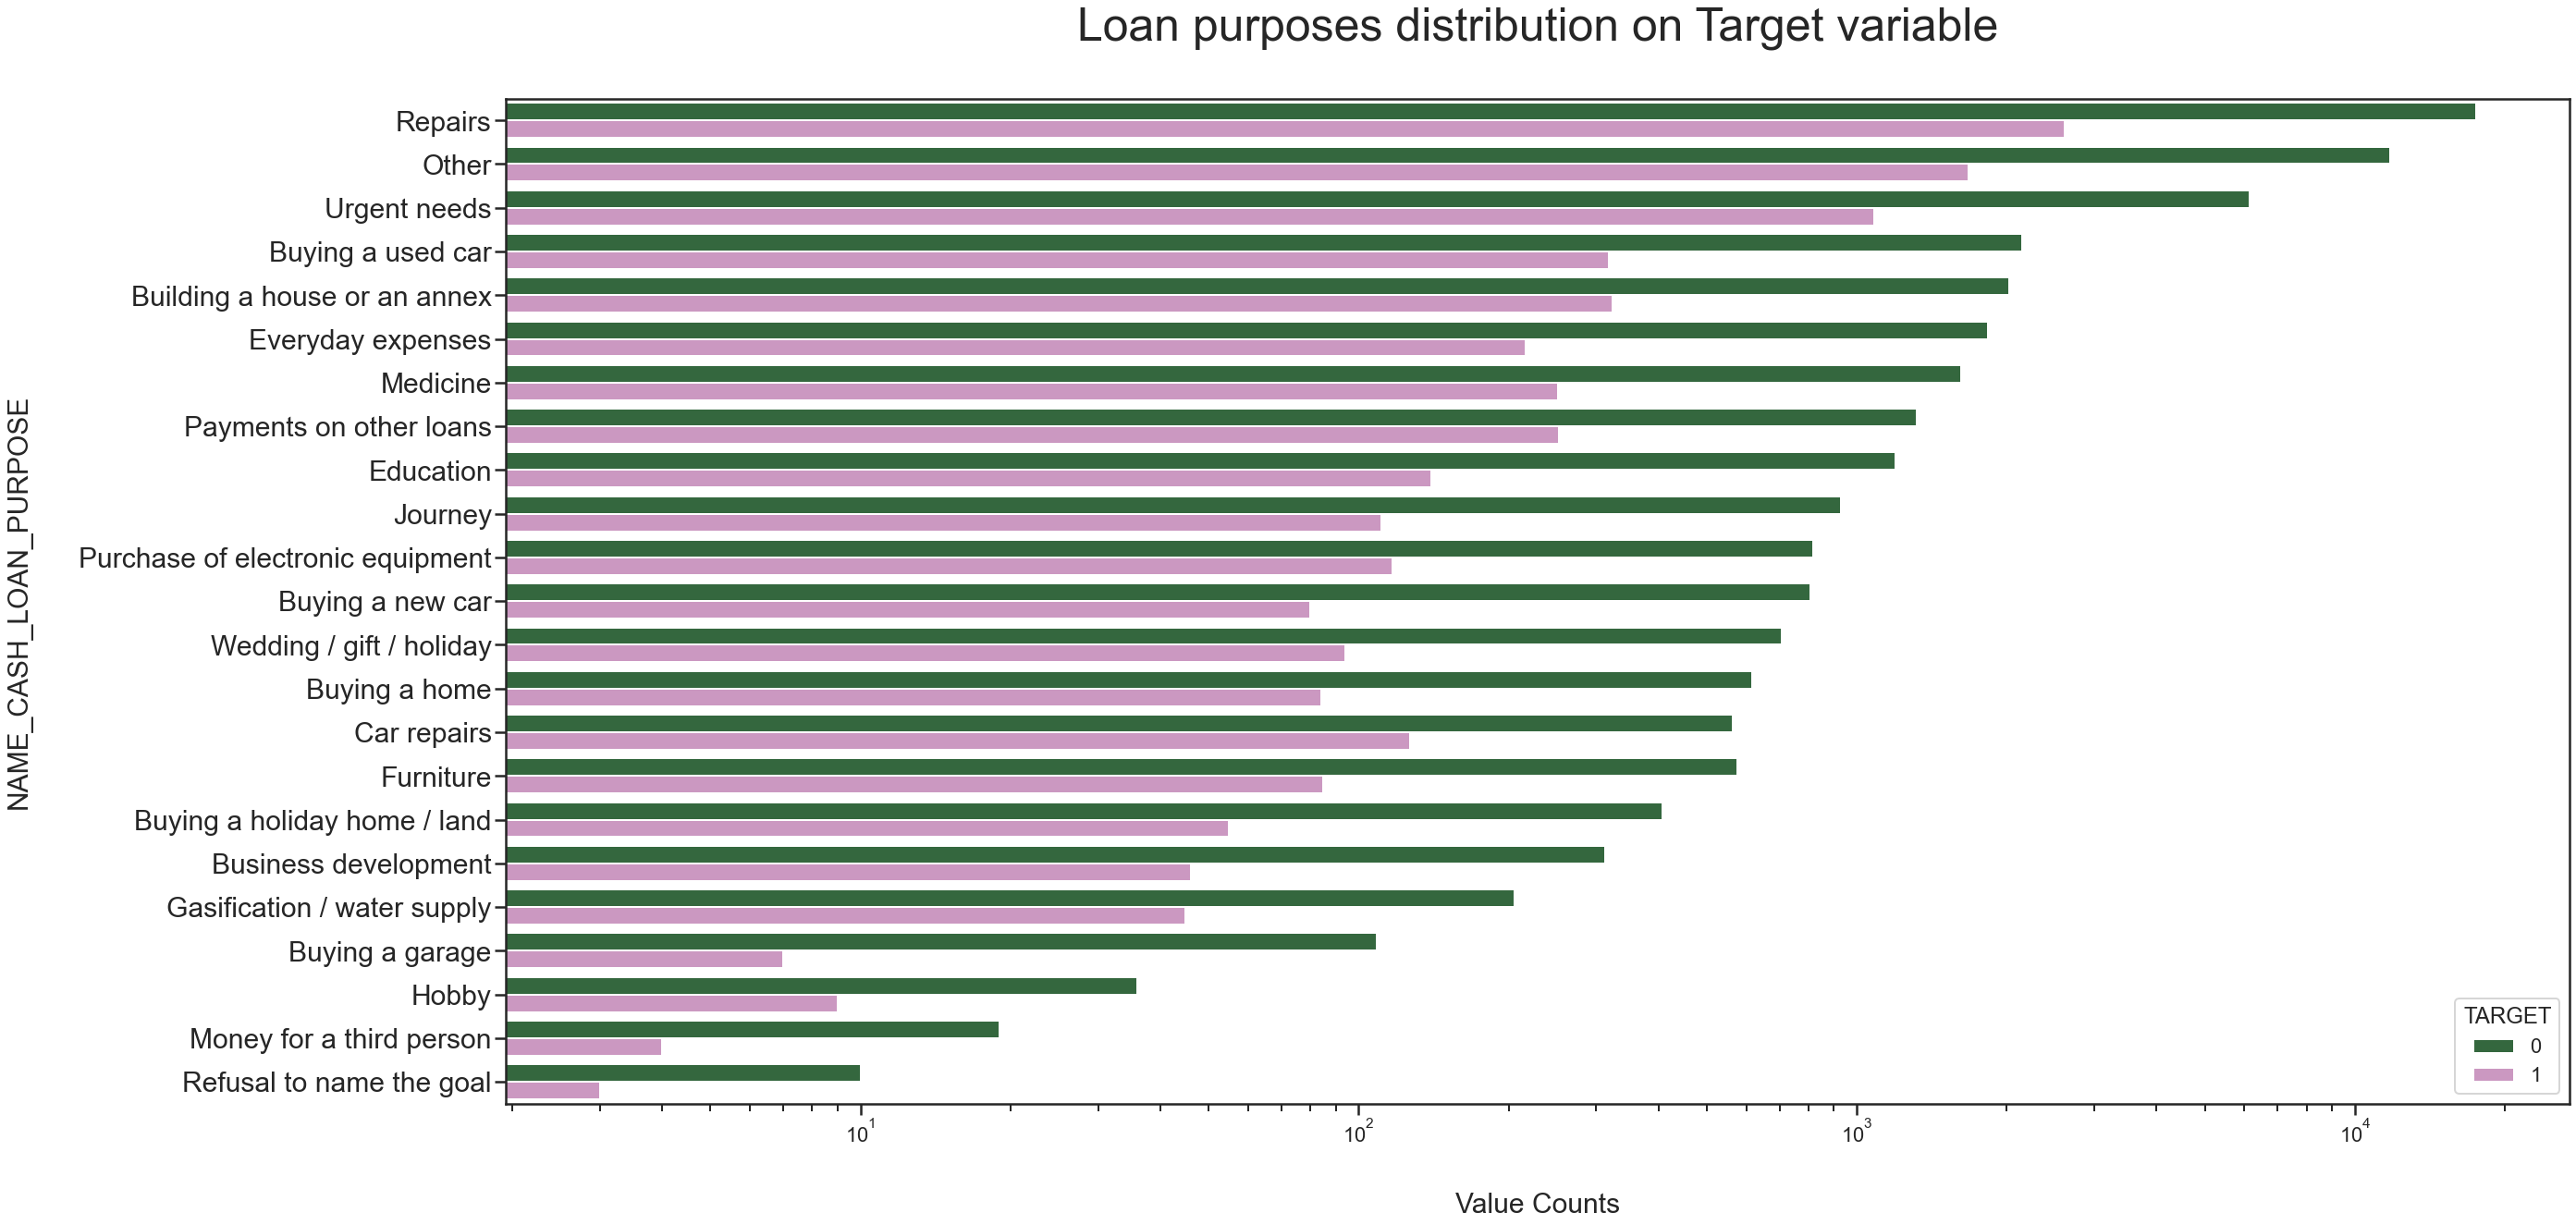

In [155]:
sns.set_style('ticks')
sns.set_context('poster')
plt.figure(figsize=(40,20))
plt.xscale('log')
sns.countplot(data = Merged_Data_set, y= 'NAME_CASH_LOAN_PURPOSE', order=Merged_Data_set['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='cubehelix')
plt.title('Loan purposes distribution on Target variable\n', fontsize = 50, loc = 'center')
plt.xlabel("Value Counts",labelpad=50,fontsize=30)
plt.ylabel("NAME_CASH_LOAN_PURPOSE",labelpad=50,fontsize=30)
plt.yticks(fontsize=30)
plt.show()

**Approch:**

 - **On the Basis of Target Variable.**
     - **Although the loan given for the purposes of repair is more likely to be paid on time or have no payment difficulties, the count of defaulters is also higher for the same.**
     - **Those who took loans to buy a new car and to buy a home have the same problems paying their installments.**
     - **Comparing Education & Medicine loan purpose, there is a high number of clients experiencing difficulties paying off their loans when compared to "Education".**
     - **Most of the clients who take out a loan on an urgent need or for some other purpose make the payment on time.**
     

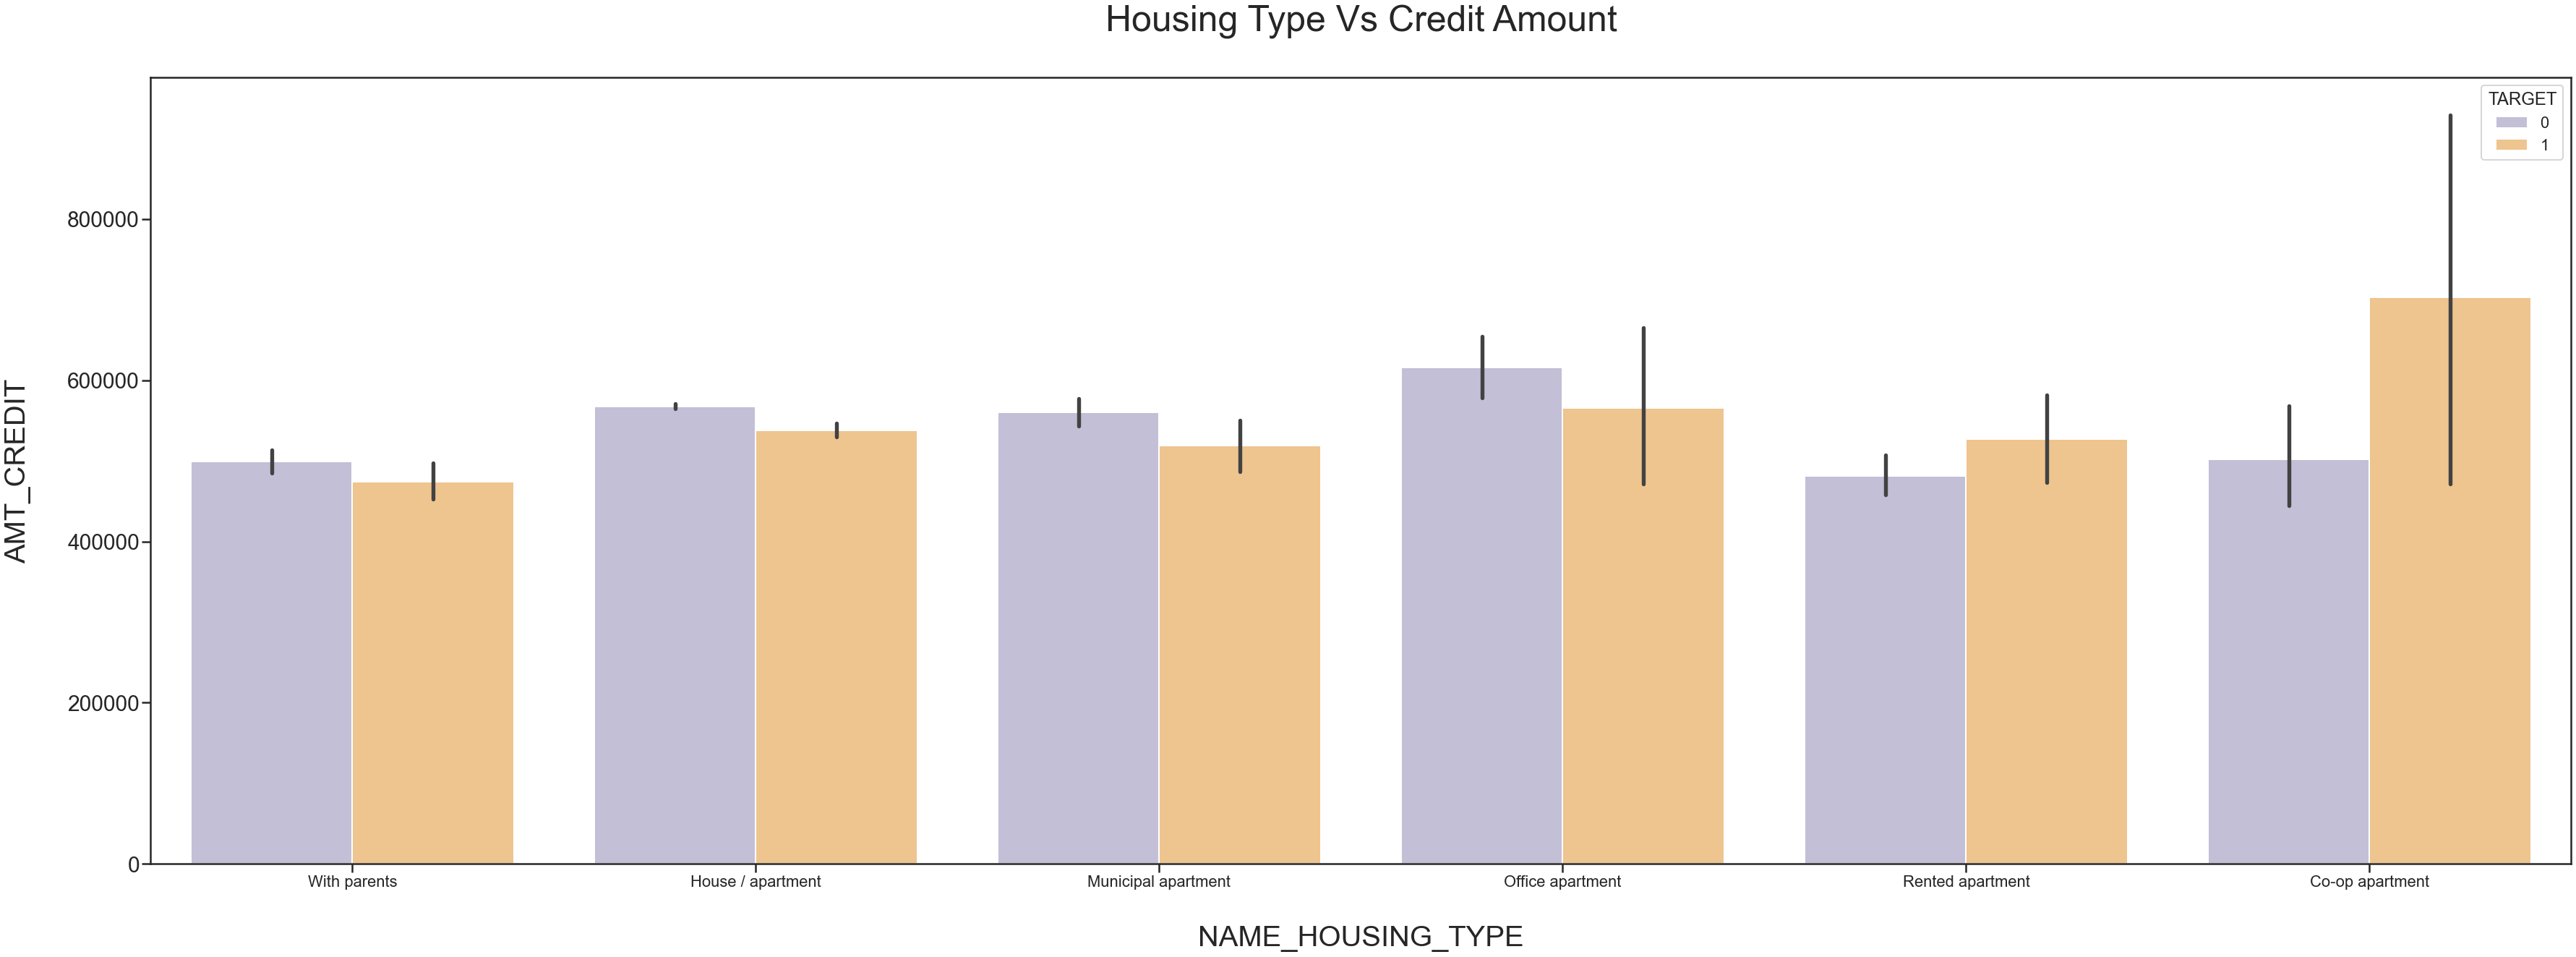

In [156]:
sns.set_style('ticks')
sns.set_context('poster')
plt.figure(figsize=(60,20))
sns.barplot(data = Merged_Data_set, y= 'AMT_CREDIT', x = 'NAME_HOUSING_TYPE',hue = 'TARGET',palette='PuOr_r')
plt.title('Housing Type Vs Credit Amount\n', fontsize = 50)
plt.xlabel("NAME_HOUSING_TYPE",labelpad=50,fontsize=40)
plt.ylabel("AMT_CREDIT",labelpad=50,fontsize=40)
plt.yticks(fontsize=30)
plt.show()

**Approch:**

 - **The above graph shows that the Client with a co-op apartment has a higher credit amount for Target 1 whereas the Client with an office apartment has a higher credit amount for Target 0.**
 - **Banks should avoid giving loans to housing types like Co-op apartments since they experience payment difficulties, whereas they should focus on housing types like office apartments, municipal apartments, or houses.**


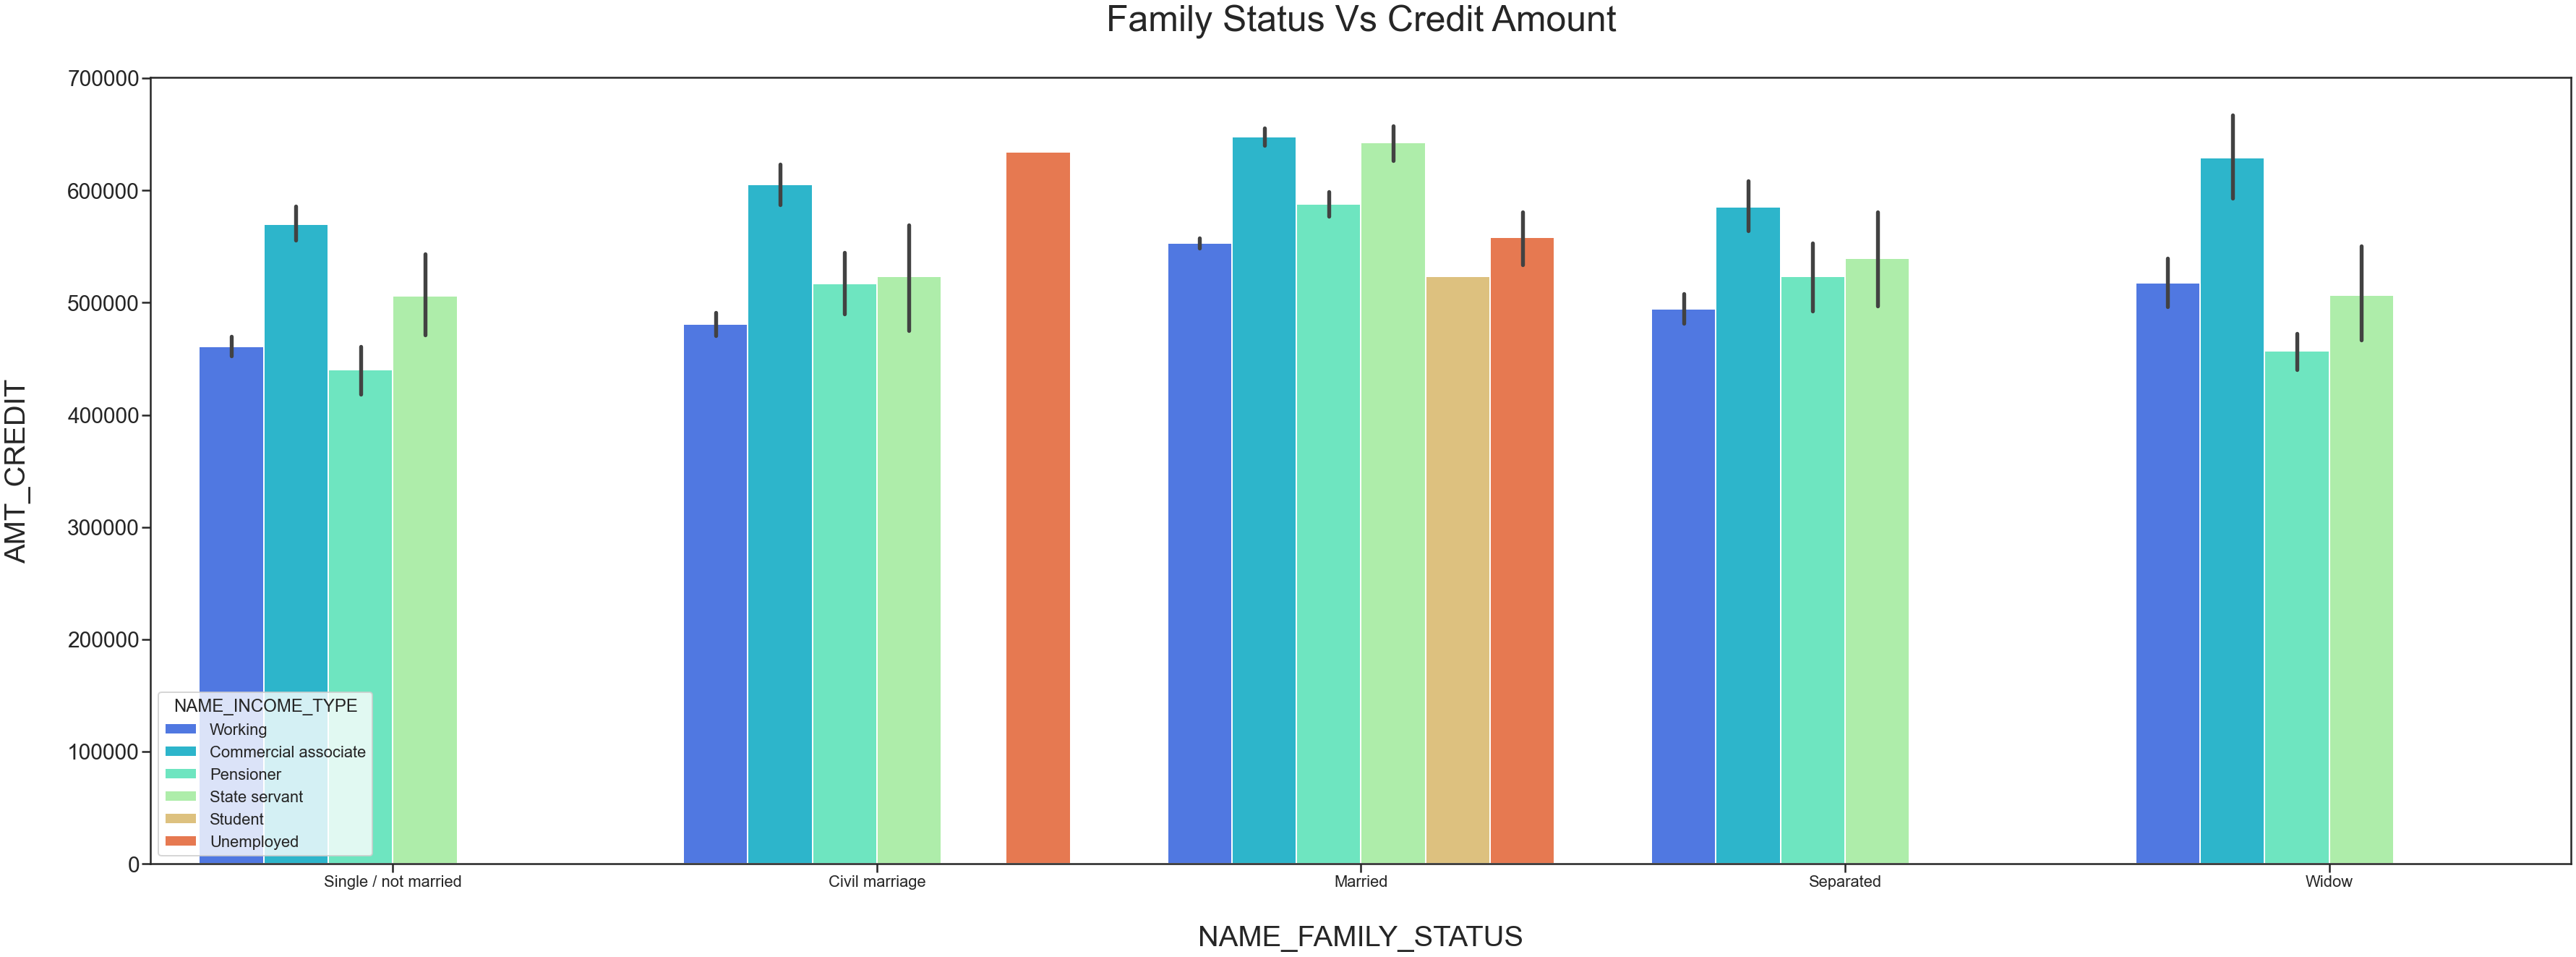

In [157]:
sns.set_style('ticks')
sns.set_context('poster')
plt.figure(figsize=(60,20))
sns.barplot(data = Merged_Data_set, y = 'AMT_CREDIT', x = 'NAME_FAMILY_STATUS',hue = 'NAME_INCOME_TYPE',palette='rainbow',orient='v')
plt.title('Family Status Vs Credit Amount\n', fontsize = 50)
plt.xlabel("NAME_FAMILY_STATUS",labelpad=50,fontsize=40)
plt.ylabel("AMT_CREDIT",labelpad=50,fontsize=40)
plt.yticks(fontsize=30)
plt.show()


**Approch:**

 - **The above graph shows the Client with a family status of married and an income type of Commercial Associate and State Servant has a higher credit limit.**
 - **We can see that there are clients who are married and have student income and have a good credit limit.**
 - **Clients who have done civil marriages and are unemployed tend to have higher credit limits.**

# Final Conclusion:

 - **To ensure successful payments, banks should pay more attention to contracts type for students, pensioners, and businessmen with housing types other than co-op apartments or office apartments.**
 - **There is an increase in payment difficulties among those who work and a decrease in payment difficulties among those who are pensioners while comparing both default payment and non-default payment.**
 - **Female clients and married clients are more likely to pay their outstanding debts on time.**
 - **Clients with higher education face fewer payment difficulties.**
 - **Those with low income should be less targeted because the majority of the time they have trouble paying their debt on time.**
 - **Obtain as many clients as possible from housing types with parents, as they experience the smallest number of unsuccessful payments.**

- **To minimize risk, loan applications should be reviewed for the following factors.**
    1. CODE_GENDER
    2. AMT_INCOME_TOTAL
    3. AMT_CREDIT
    4. AMT_ANNUITY
    5. NAME_FAMILY_STATUS
    6. NAME_HOUSING_TYPE
    7. NAME_EDUCATION_TYPE
    8. NAME_CASH_LOAN_PURPOSE
                                                             
                                                             
 - **Recommended groups to be consider.**
     1. An applicant whose application has been approved in a previous application.
     2. Married applicant compared to other family status.
     3. females are more favorable than males.
     4. Other than Co-op apartment, housing type can be consider.
     5. Client with a well-recognized job and are highly educated.
     6. Client who are more intrested in Cash loans over Revolving loans.
                                                         
                                                                        
 - **Recommended groups not to be consider.**
     1. Unemployed clients.
     2. Low income people groups.
     3. Customers who previously refused, cancelled or did not use an offer.
     4. client with younger age and having a lower or secondary education.